In [86]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


## Task 1: Exploratory Data Analysis (EDA):
- 1.	Load the dataset and perform basic data exploration.

In [87]:

df = pd.read_csv("wine.csv")
df.head()


Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

In [88]:
# Data Previews 
print(df.info())

print("\n Null Value Checking")
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None

 Null Value Checking


Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

- 2.	Examine the distribution of features using histograms, box plots, or density plots.

In [89]:
# Check data Distribution
df.describe()


Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.998859       0.124453         0.572359    2.318286   
min      0.980000    0.340000       0.130000         0.410000    1.280000   
25%      1.742500    1.205000       0.270000         1.250000    3.220000   
50%      2.355000    2.135000       0.340000         1.555000    4.690000   
75%      2.800000    2.875000       0.437500         1.950000    6.200000   
max      3.880000    5.080000       0.660000         3.580000   13.000000   

              Hue    Dilution      Proline  
count  178.000000  178.000000   178.000000  
mean     0.957449    2.611685   746.893258  
std      0.228572    0.709990   314.907474  
min      0.480000    1.270000   278.000000  
25%      0.782500    1.937500   500.500000  
50%      0.965000    2.780000   673.500000  
75%      1.120000    3.170000   985.000000  
max      1.710000    4.000000  1680.000000

array([[<Axes: title={'center': 'Type'}>,
        <Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'Malic'}>,
        <Axes: title={'center': 'Ash'}>],
       [<Axes: title={'center': 'Alcalinity'}>,
        <Axes: title={'center': 'Magnesium'}>,
        <Axes: title={'center': 'Phenols'}>,
        <Axes: title={'center': 'Flavanoids'}>],
       [<Axes: title={'center': 'Nonflavanoids'}>,
        <Axes: title={'center': 'Proanthocyanins'}>,
        <Axes: title={'center': 'Color'}>,
        <Axes: title={'center': 'Hue'}>],
       [<Axes: title={'center': 'Dilution'}>,
        <Axes: title={'center': 'Proline'}>, <Axes: >, <Axes: >]],
      dtype=object)

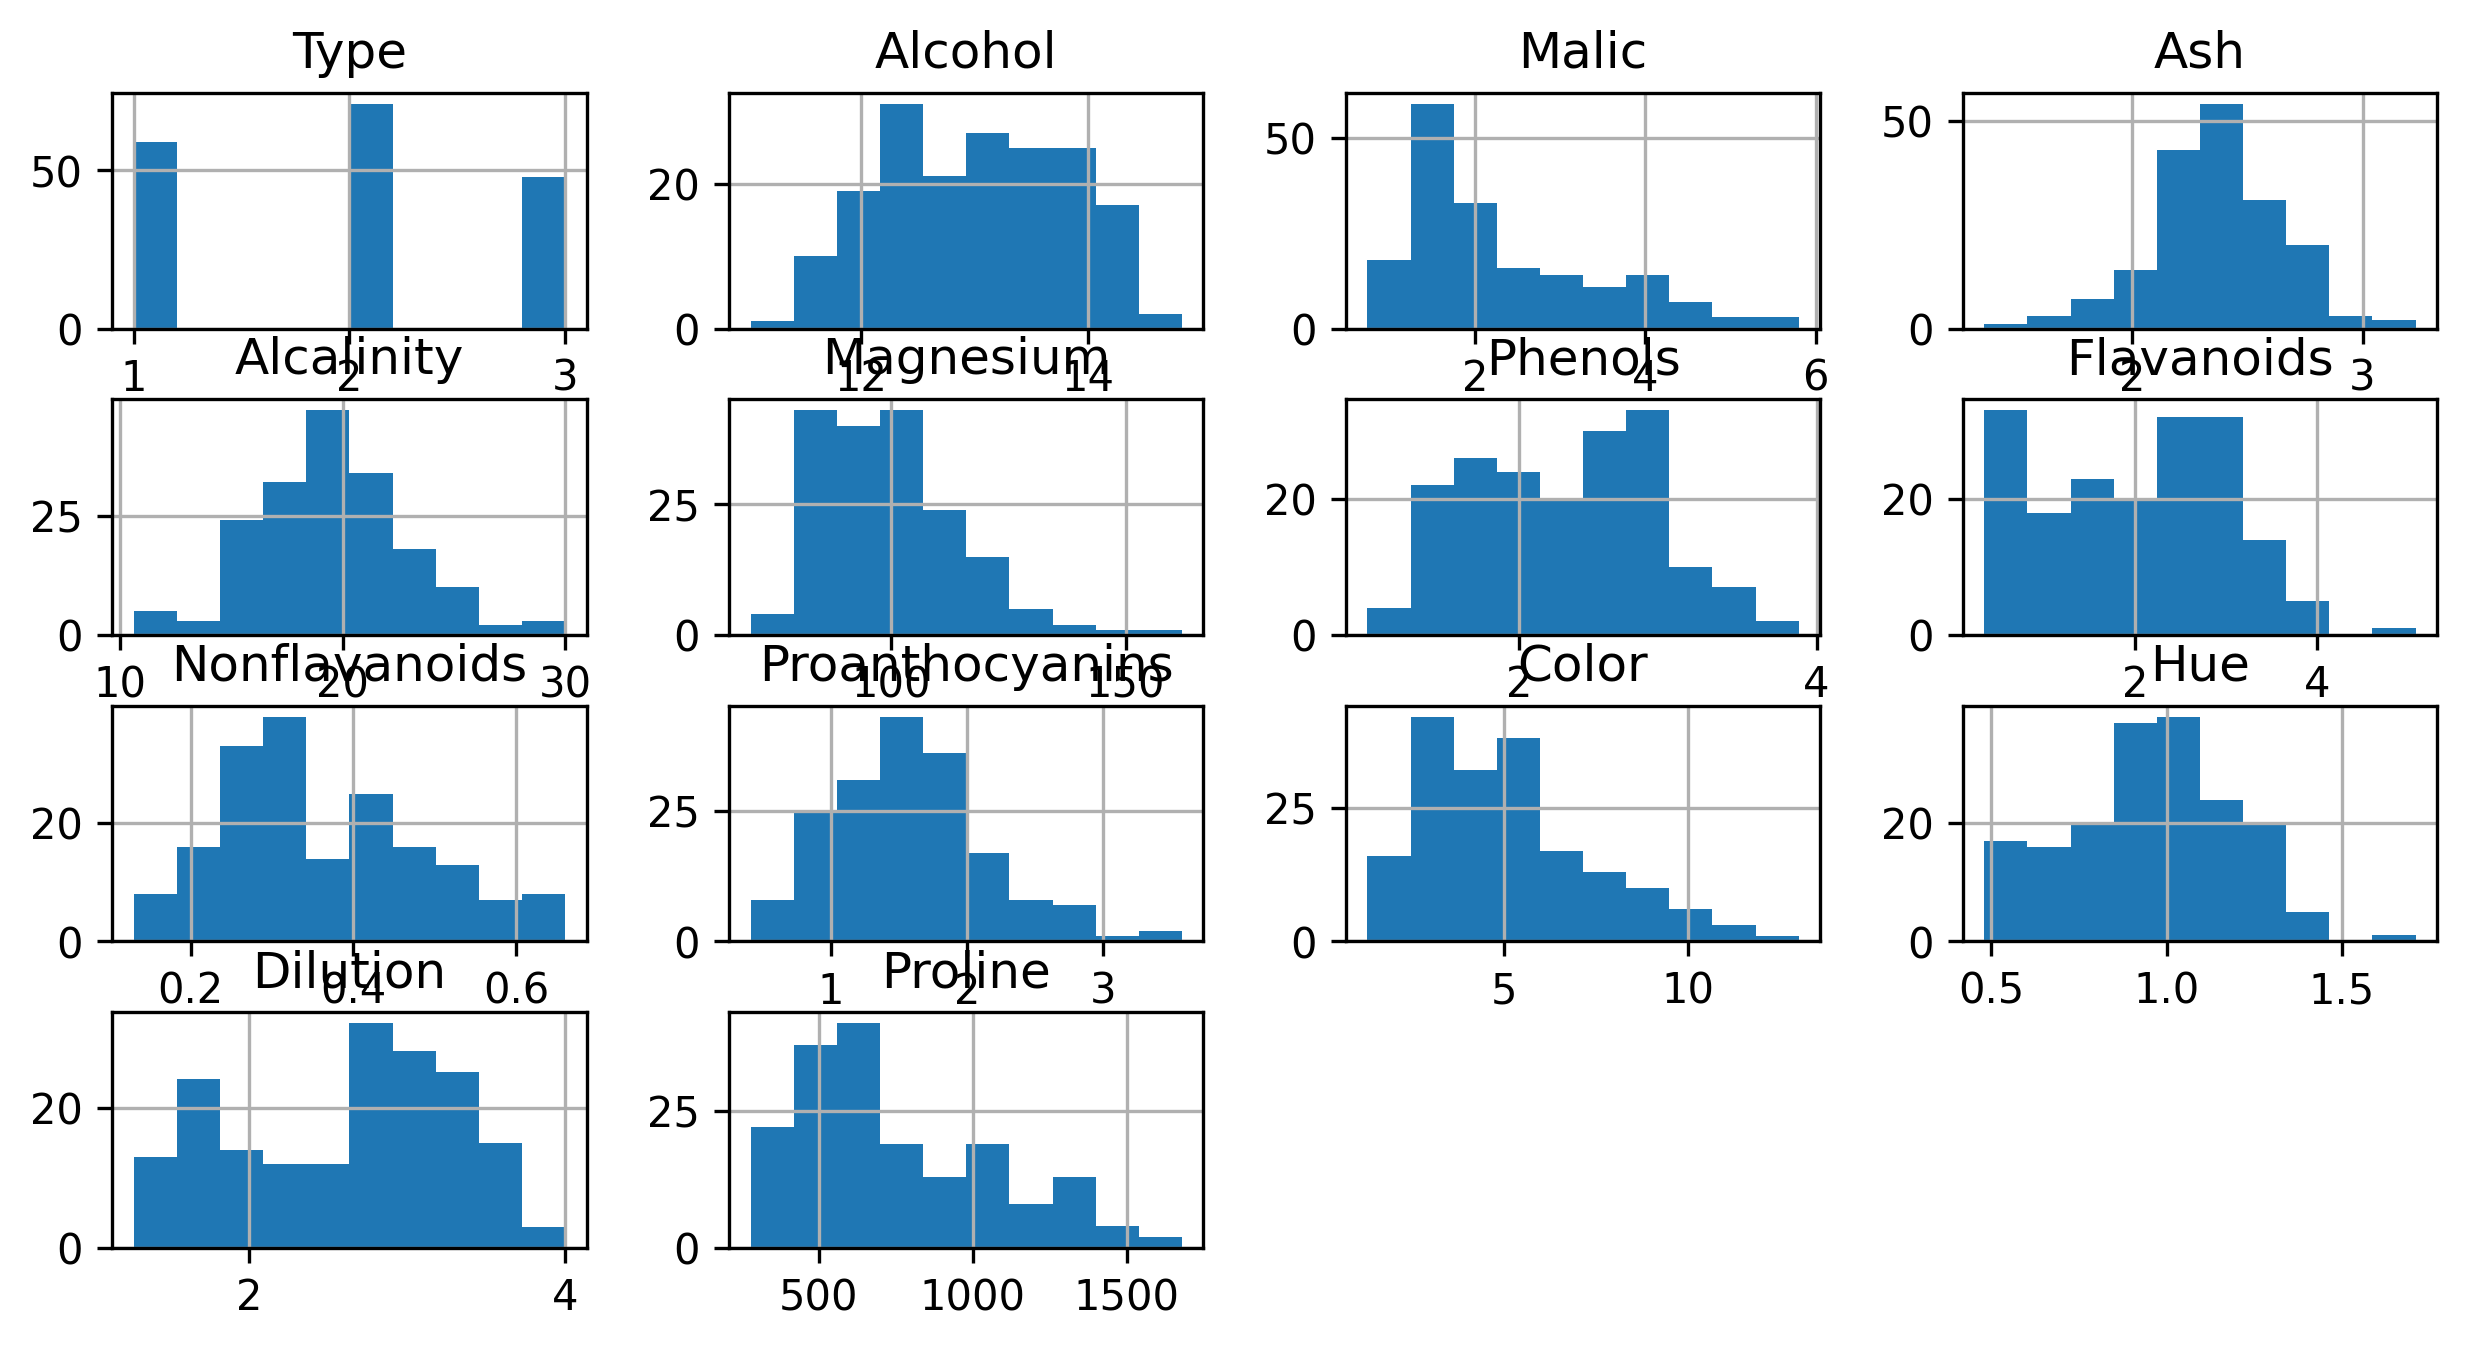

In [90]:
df.hist()


In [91]:
sns.pairplot(df)


In [92]:
df


Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0             0.28             2.29   5.64  1.04      3.92     1065  
1             0.26             1.28   4.38  1.05      3.40     1050  
2             0.30             2.81   5.68  1.03      3.17     1185  
3             0.24             2.18   7.80  0.86      3.45     1480  
4             0.39             1.82   4.32  1.04      2.93      735  
..             ...              ...    ...   ...       ...      ...  
173           0.52             1.06   7.70  0.64      1.74      740  
174           0.43             1.41   7.30  0.70      1.56      750  
175           0.43             1.35  10.20  0.59      1.56      835  
176           0.53             1.46   9.30  0.60      1.62      840  
177           0.56             1.35   9.20  0.61      1.60      560  

[178 rows x 14 columns]

3.	Investigate correlations between features to understand relationships within the data.

In [93]:
df.corr()


Type   Alcohol     Malic       Ash  Alcalinity  \
Type             1.000000 -0.328222  0.437776 -0.049643    0.517859   
Alcohol         -0.328222  1.000000  0.094397  0.211545   -0.310235   
Malic            0.437776  0.094397  1.000000  0.164045    0.288500   
Ash             -0.049643  0.211545  0.164045  1.000000    0.443367   
Alcalinity       0.517859 -0.310235  0.288500  0.443367    1.000000   
Magnesium       -0.209179  0.270798 -0.054575  0.286587   -0.083333   
Phenols         -0.719163  0.289101 -0.335167  0.128980   -0.321113   
Flavanoids      -0.847498  0.236815 -0.411007  0.115077   -0.351370   
Nonflavanoids    0.489109 -0.155929  0.292977  0.186230    0.361922   
Proanthocyanins -0.499130  0.136698 -0.220746  0.009652   -0.197327   
Color            0.265668  0.546364  0.248985  0.258887    0.018732   
Hue             -0.617369 -0.071747 -0.561296 -0.074667   -0.273955   
Dilution        -0.788230  0.072343 -0.368710  0.003911   -0.276769   
Proline         -0.633717  0.643720 -0.192011  0.223626   -0.440597   

                 Magnesium   Phenols  Flavanoids  Nonflavanoids  \
Type             -0.209179 -0.719163   -0.847498       0.489109   
Alcohol           0.270798  0.289101    0.236815      -0.155929   
Malic            -0.054575 -0.335167   -0.411007       0.292977   
Ash               0.286587  0.128980    0.115077       0.186230   
Alcalinity       -0.083333 -0.321113   -0.351370       0.361922   
Magnesium         1.000000  0.214401    0.195784      -0.256294   
Phenols           0.214401  1.000000    0.864564      -0.449935   
Flavanoids        0.195784  0.864564    1.000000      -0.537900   
Nonflavanoids    -0.256294 -0.449935   -0.537900       1.000000   
Proanthocyanins   0.236441  0.612413    0.652692      -0.365845   
Color             0.199950 -0.055136   -0.172379       0.139057   
Hue               0.055398  0.433681    0.543479      -0.262640   
Dilution          0.066004  0.699949    0.787194      -0.503270   
Proline           0.393351  0.498115    0.494193      -0.311385   

                 Proanthocyanins     Color       Hue  Dilution   Proline  
Type                   -0.499130  0.265668 -0.617369 -0.788230 -0.633717  
Alcohol                 0.136698  0.546364 -0.071747  0.072343  0.643720  
Malic                  -0.220746  0.248985 -0.561296 -0.368710 -0.192011  
Ash                     0.009652  0.258887 -0.074667  0.003911  0.223626  
Alcalinity             -0.197327  0.018732 -0.273955 -0.276769 -0.440597  
Magnesium               0.236441  0.199950  0.055398  0.066004  0.393351  
Phenols                 0.612413 -0.055136  0.433681  0.699949  0.498115  
Flavanoids              0.652692 -0.172379  0.543479  0.787194  0.494193  
Nonflavanoids          -0.365845  0.139057 -0.262640 -0.503270 -0.311385  
Proanthocyanins         1.000000 -0.025250  0.295544  0.519067  0.330417  
Color                  -0.025250  1.000000 -0.521813 -0.428815  0.316100  
Hue                     0.295544 -0.521813  1.000000  0.565468  0.236183  
Dilution                0.519067 -0.428815  0.565468  1.000000  0.312761  
Proline                 0.330417  0.316100  0.236183  0.312761  1.000000

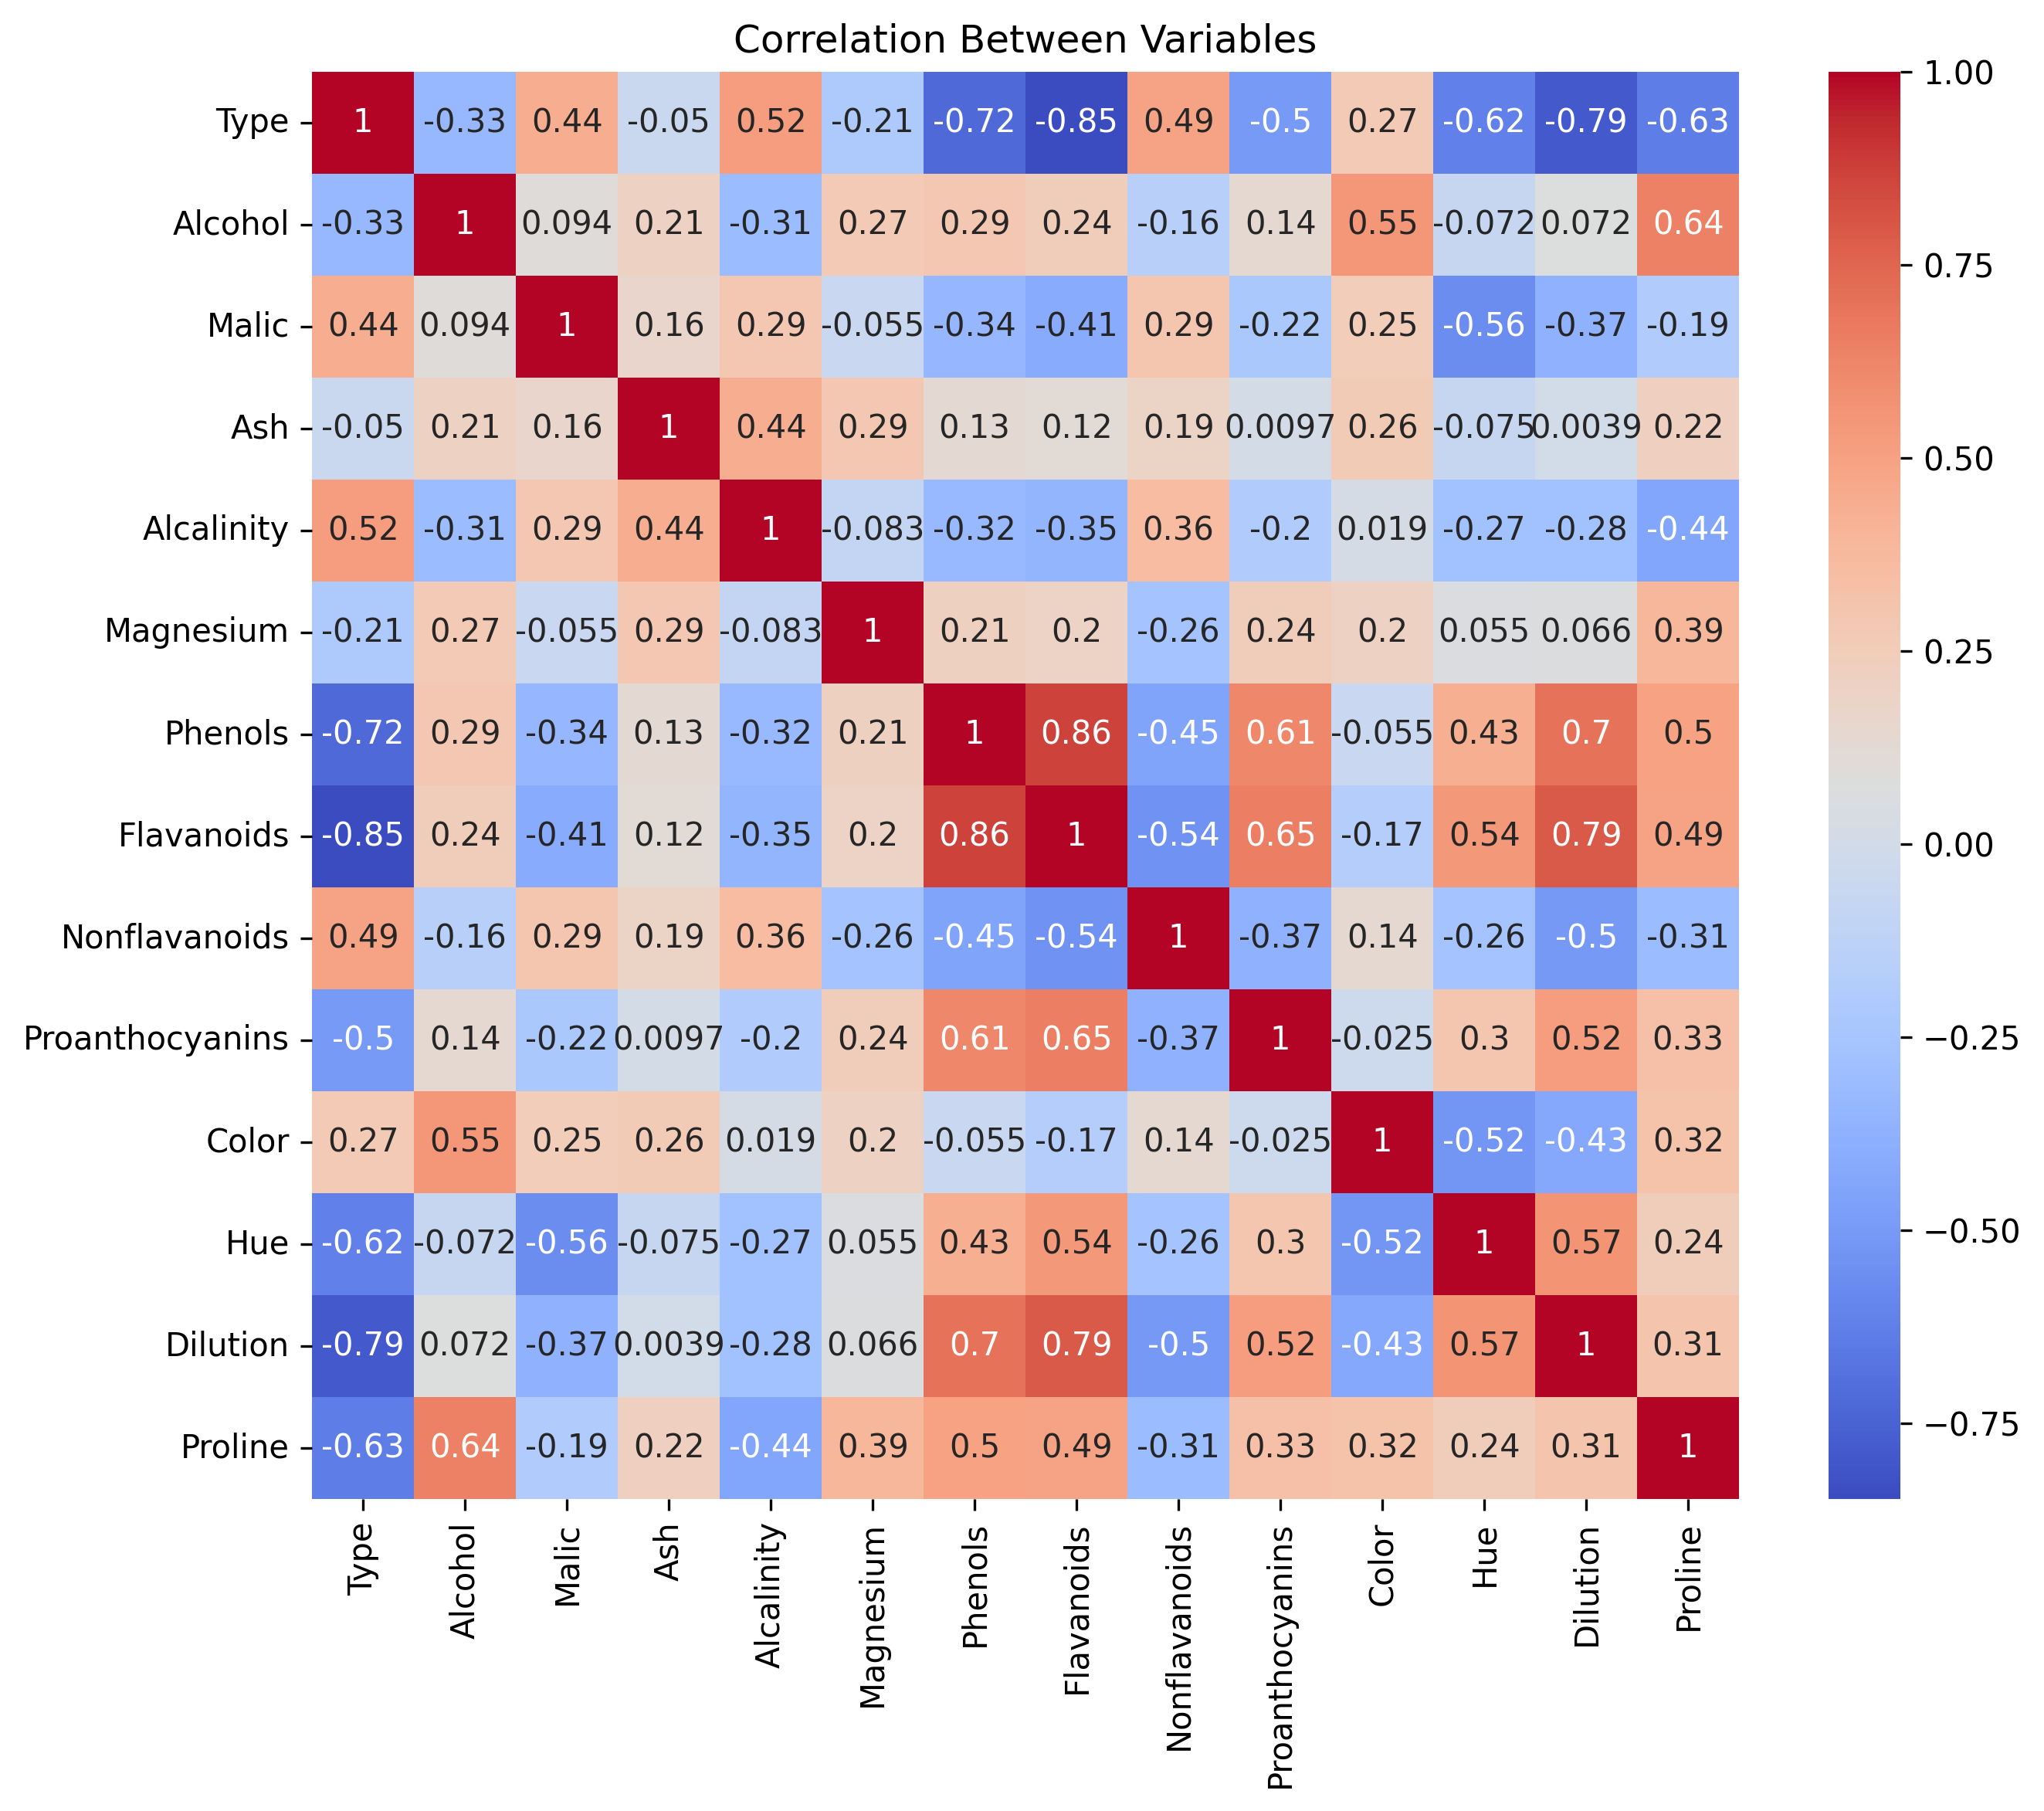

In [94]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Between Variables')
plt.show()


In [95]:
Type = df["Type"]
df.drop(columns="Type",inplace=True)


In [96]:
Type


0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Type, Length: 178, dtype: int64

# Task 2: Dimensionality Reduction with PCA:
1.	Standardize the features to ensure they have a mean of 0 and a standard deviation of Implement PCA to reduce the dimensionality of the dataset.

In [97]:
sc = StandardScaler()
x = sc.fit_transform(df)
x


array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

2.	Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.

In [98]:
pca = PCA()
pcs = pca.fit_transform(x)
pd.DataFrame(pcs)


0         1         2         3         4         5         6   \
0    3.316751 -1.443463 -0.165739 -0.215631  0.693043 -0.223880  0.596427   
1    2.209465  0.333393 -2.026457 -0.291358 -0.257655 -0.927120  0.053776   
2    2.516740 -1.031151  0.982819  0.724902 -0.251033  0.549276  0.424205   
3    3.757066 -2.756372 -0.176192  0.567983 -0.311842  0.114431 -0.383337   
4    1.008908 -0.869831  2.026688 -0.409766  0.298458 -0.406520  0.444074   
..        ...       ...       ...       ...       ...       ...       ...   
173 -3.370524 -2.216289 -0.342570  1.058527 -0.574164 -1.108788  0.958416   
174 -2.601956 -1.757229  0.207581  0.349496  0.255063 -0.026465  0.146894   
175 -2.677839 -2.760899 -0.940942  0.312035  1.271355  0.273068  0.679235   
176 -2.387017 -2.297347 -0.550696 -0.688285  0.813955  1.178783  0.633975   
177 -3.208758 -2.768920  1.013914  0.596903 -0.895193  0.296092  0.005741   

           7         8         9         10        11        12  
0    0.065139  0.641443  1.020956 -0.451563  0.540810 -0.066239  
1    1.024416 -0.308847  0.159701 -0.142657  0.388238  0.003637  
2   -0.344216 -1.177834  0.113361 -0.286673  0.000584  0.021717  
3    0.643593  0.052544  0.239413  0.759584 -0.242020 -0.369484  
4    0.416700  0.326819 -0.078366 -0.525945 -0.216664 -0.079364  
..        ...       ...       ...       ...       ...       ...  
173 -0.146097 -0.022498 -0.304117  0.139228  0.170786 -0.114427  
174 -0.552427 -0.097969 -0.206061  0.258198 -0.279431 -0.187371  
175  0.047024  0.001222 -0.247997  0.512492  0.698766  0.072078  
176  0.390829  0.057448  0.491490  0.299822  0.339821 -0.021866  
177 -0.292914  0.741660 -0.117969 -0.229964 -0.188788 -0.323965  

[178 rows x 13 columns]

In [99]:
np.cumsum(pca.explained_variance_ratio_)


array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

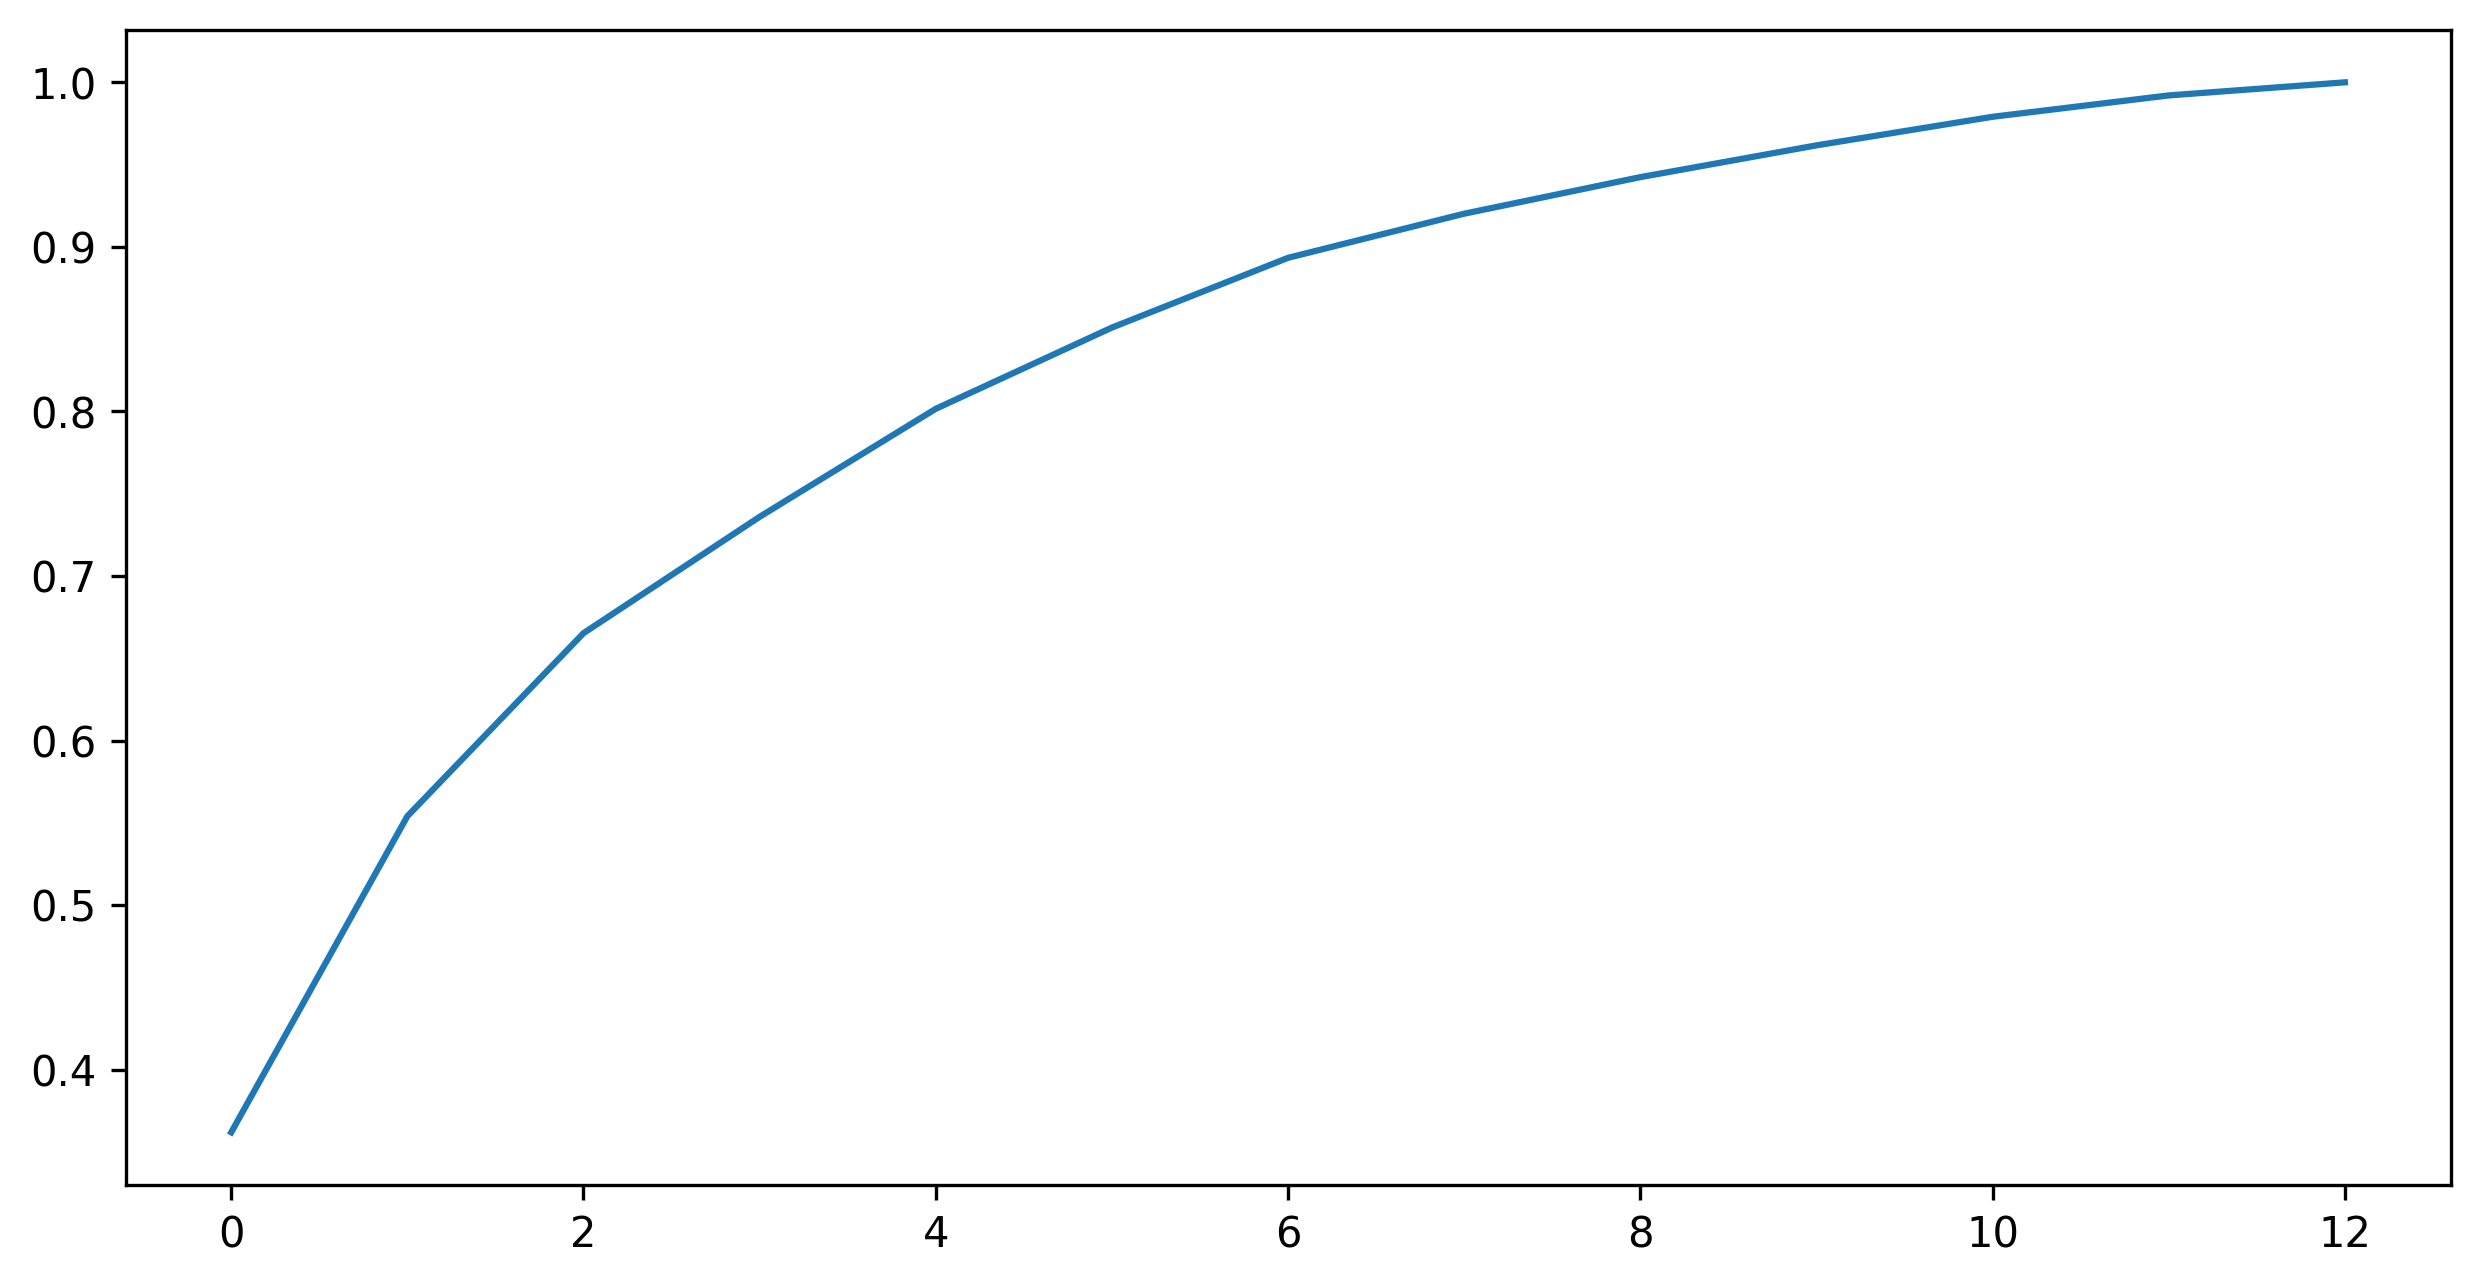

In [100]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))


3.	Transform the original dataset into the principal components.

In [101]:
pca = PCA(n_components=5)
pcs = pca.fit_transform(x)
X = pd.DataFrame(pcs, columns=['PC1','PC2','PC3',"PC4","PC5"])
X


PC1       PC2       PC3       PC4       PC5
0    3.316751 -1.443463 -0.165739 -0.215631  0.693043
1    2.209465  0.333393 -2.026457 -0.291358 -0.257655
2    2.516740 -1.031151  0.982819  0.724902 -0.251033
3    3.757066 -2.756372 -0.176192  0.567983 -0.311842
4    1.008908 -0.869831  2.026688 -0.409766  0.298458
..        ...       ...       ...       ...       ...
173 -3.370524 -2.216289 -0.342570  1.058527 -0.574164
174 -2.601956 -1.757229  0.207581  0.349496  0.255063
175 -2.677839 -2.760899 -0.940942  0.312035  1.271355
176 -2.387017 -2.297347 -0.550696 -0.688285  0.813955
177 -3.208758 -2.768920  1.013914  0.596903 -0.895193

[178 rows x 5 columns]

## Task 3: Clustering with Original Data:
1.	Apply a clustering algorithm (e.g., K-means) to the original dataset.

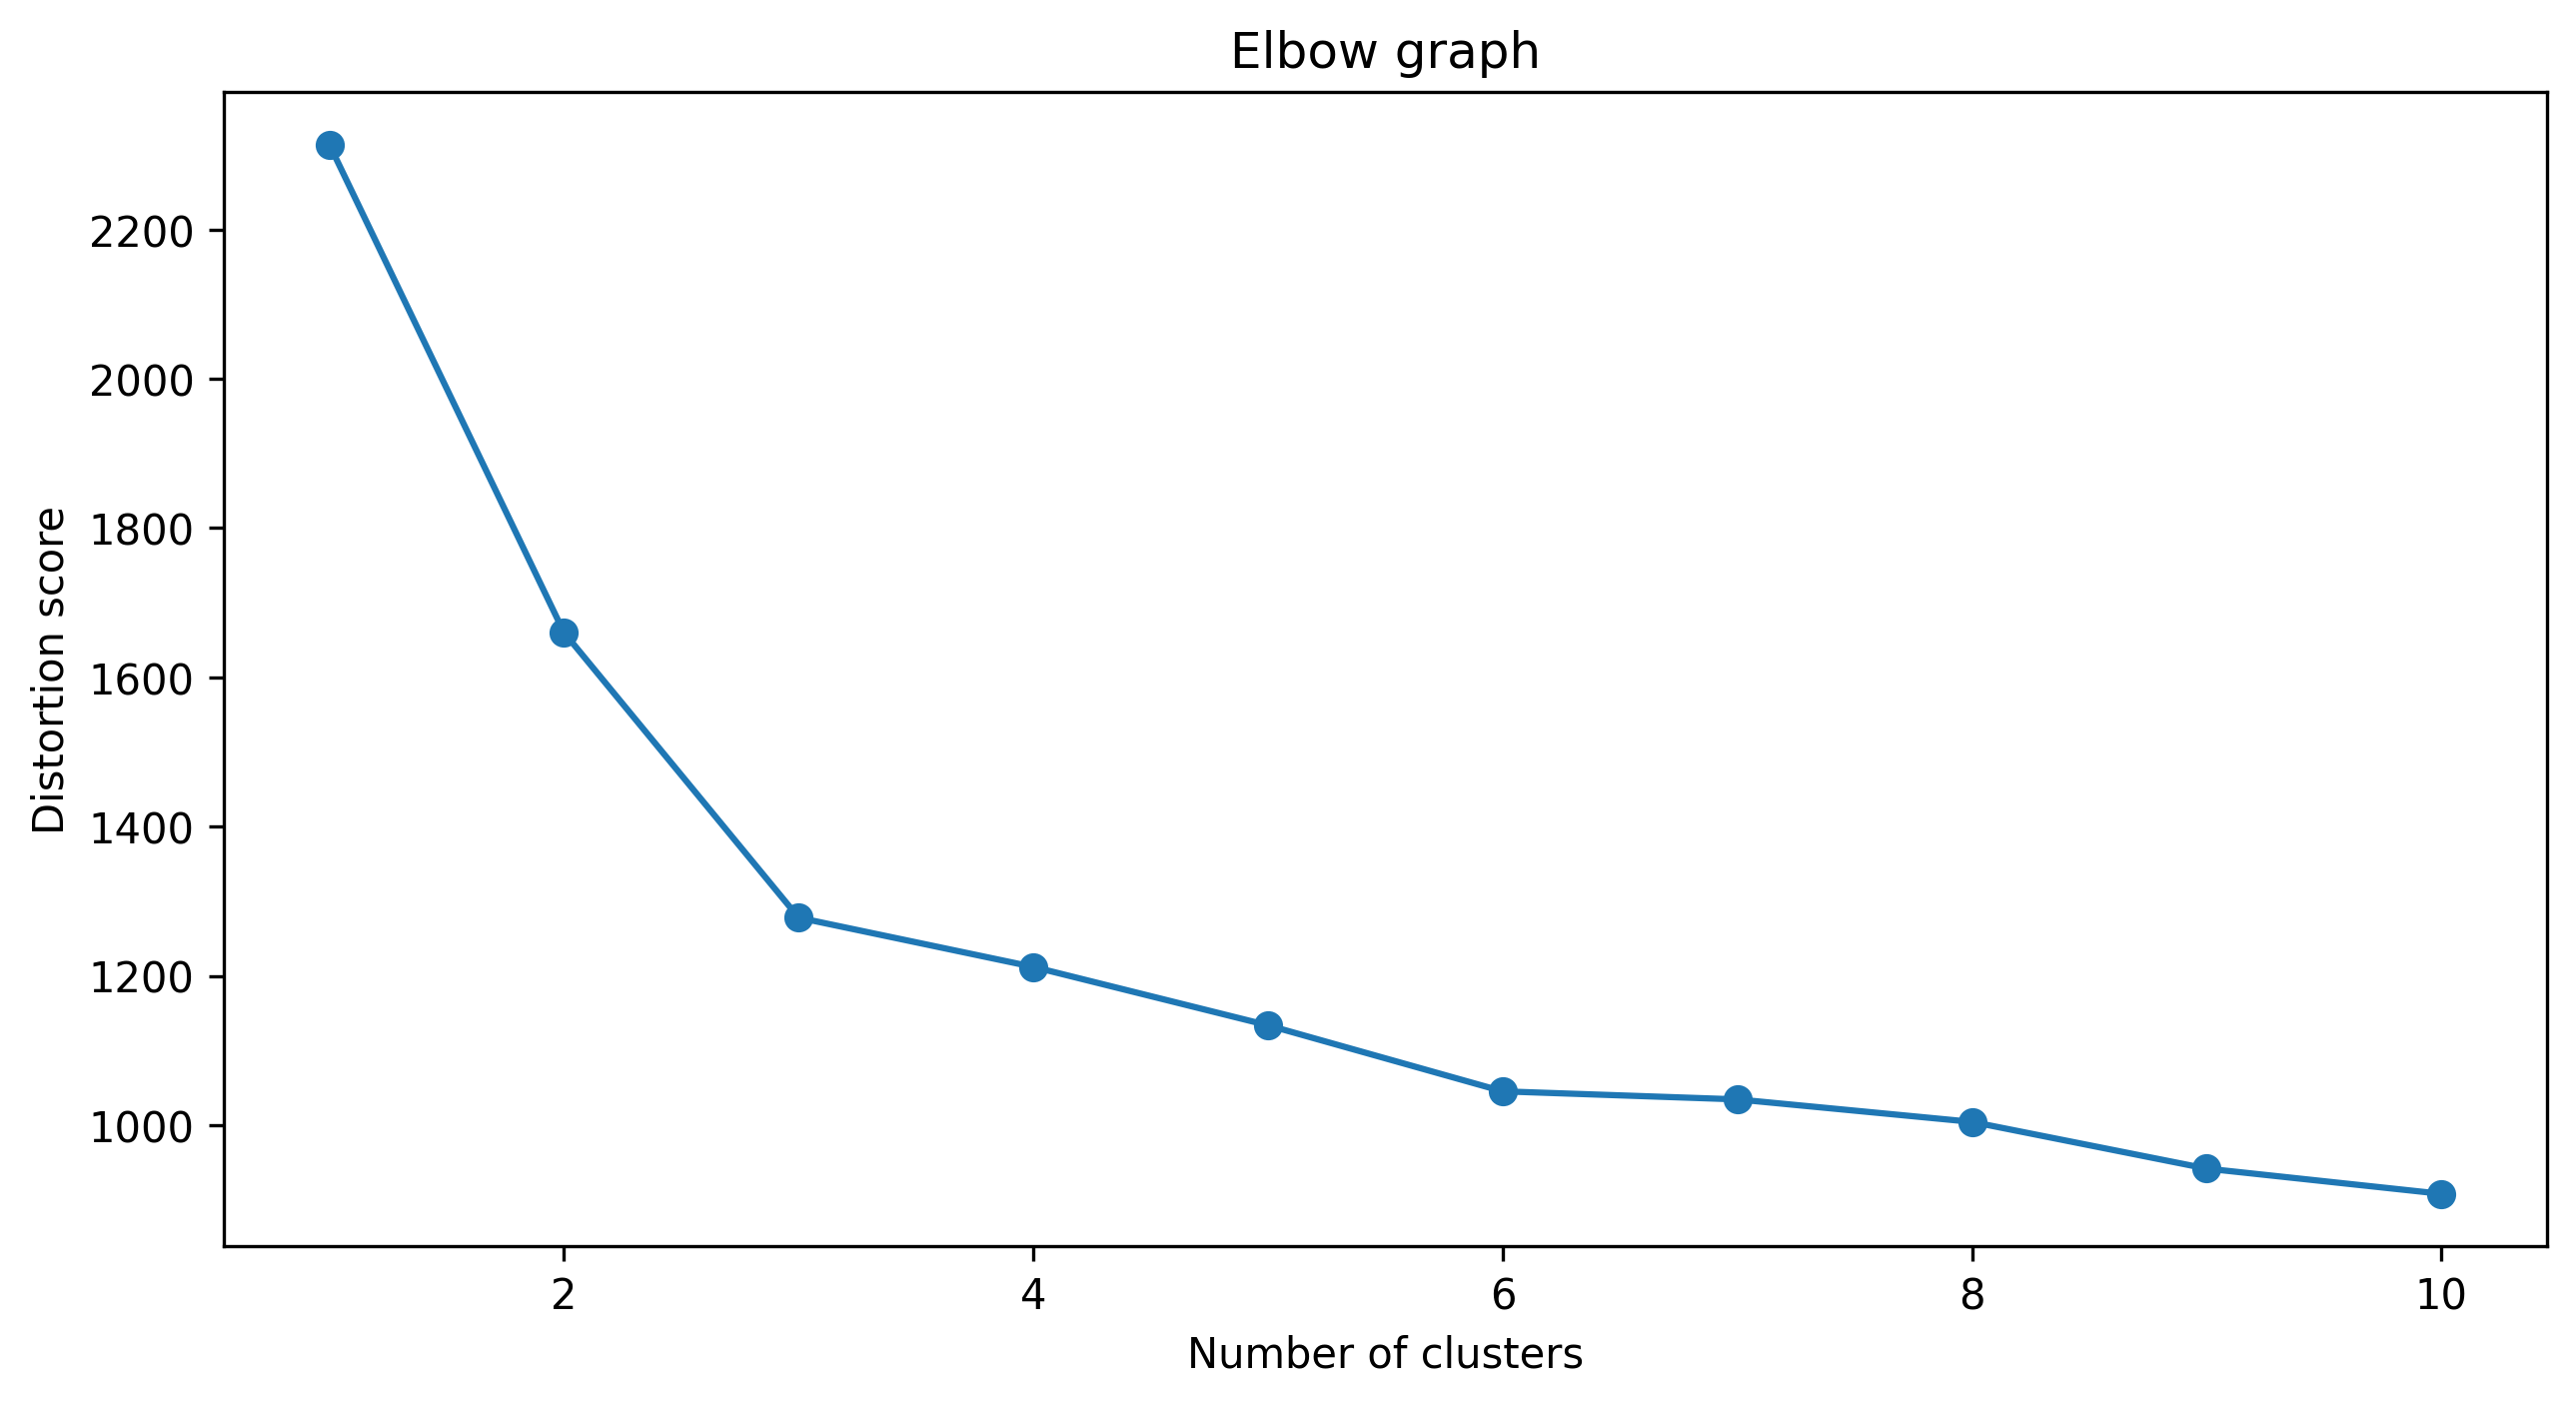

In [102]:
# Calculate the distortion score for different numbers of clusters
distortions = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    distortions.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion score')
plt.title('Elbow graph')
plt.show()


In [103]:
from sklearn.cluster import KMeans
import numpy as np

def kmean_clustering(data, k=3):
    kmeans = KMeans(n_clusters=k)
    ypred = kmeans.fit_predict(data)
    return kmeans.labels_, kmeans.cluster_centers_,ypred



In [118]:
labels , OCcenters , bypred = kmean_clustering(x , k=3)


2.	Visualize the clustering results using appropriate plots.

<Axes: xlabel='Alcohol', ylabel='Ash'>

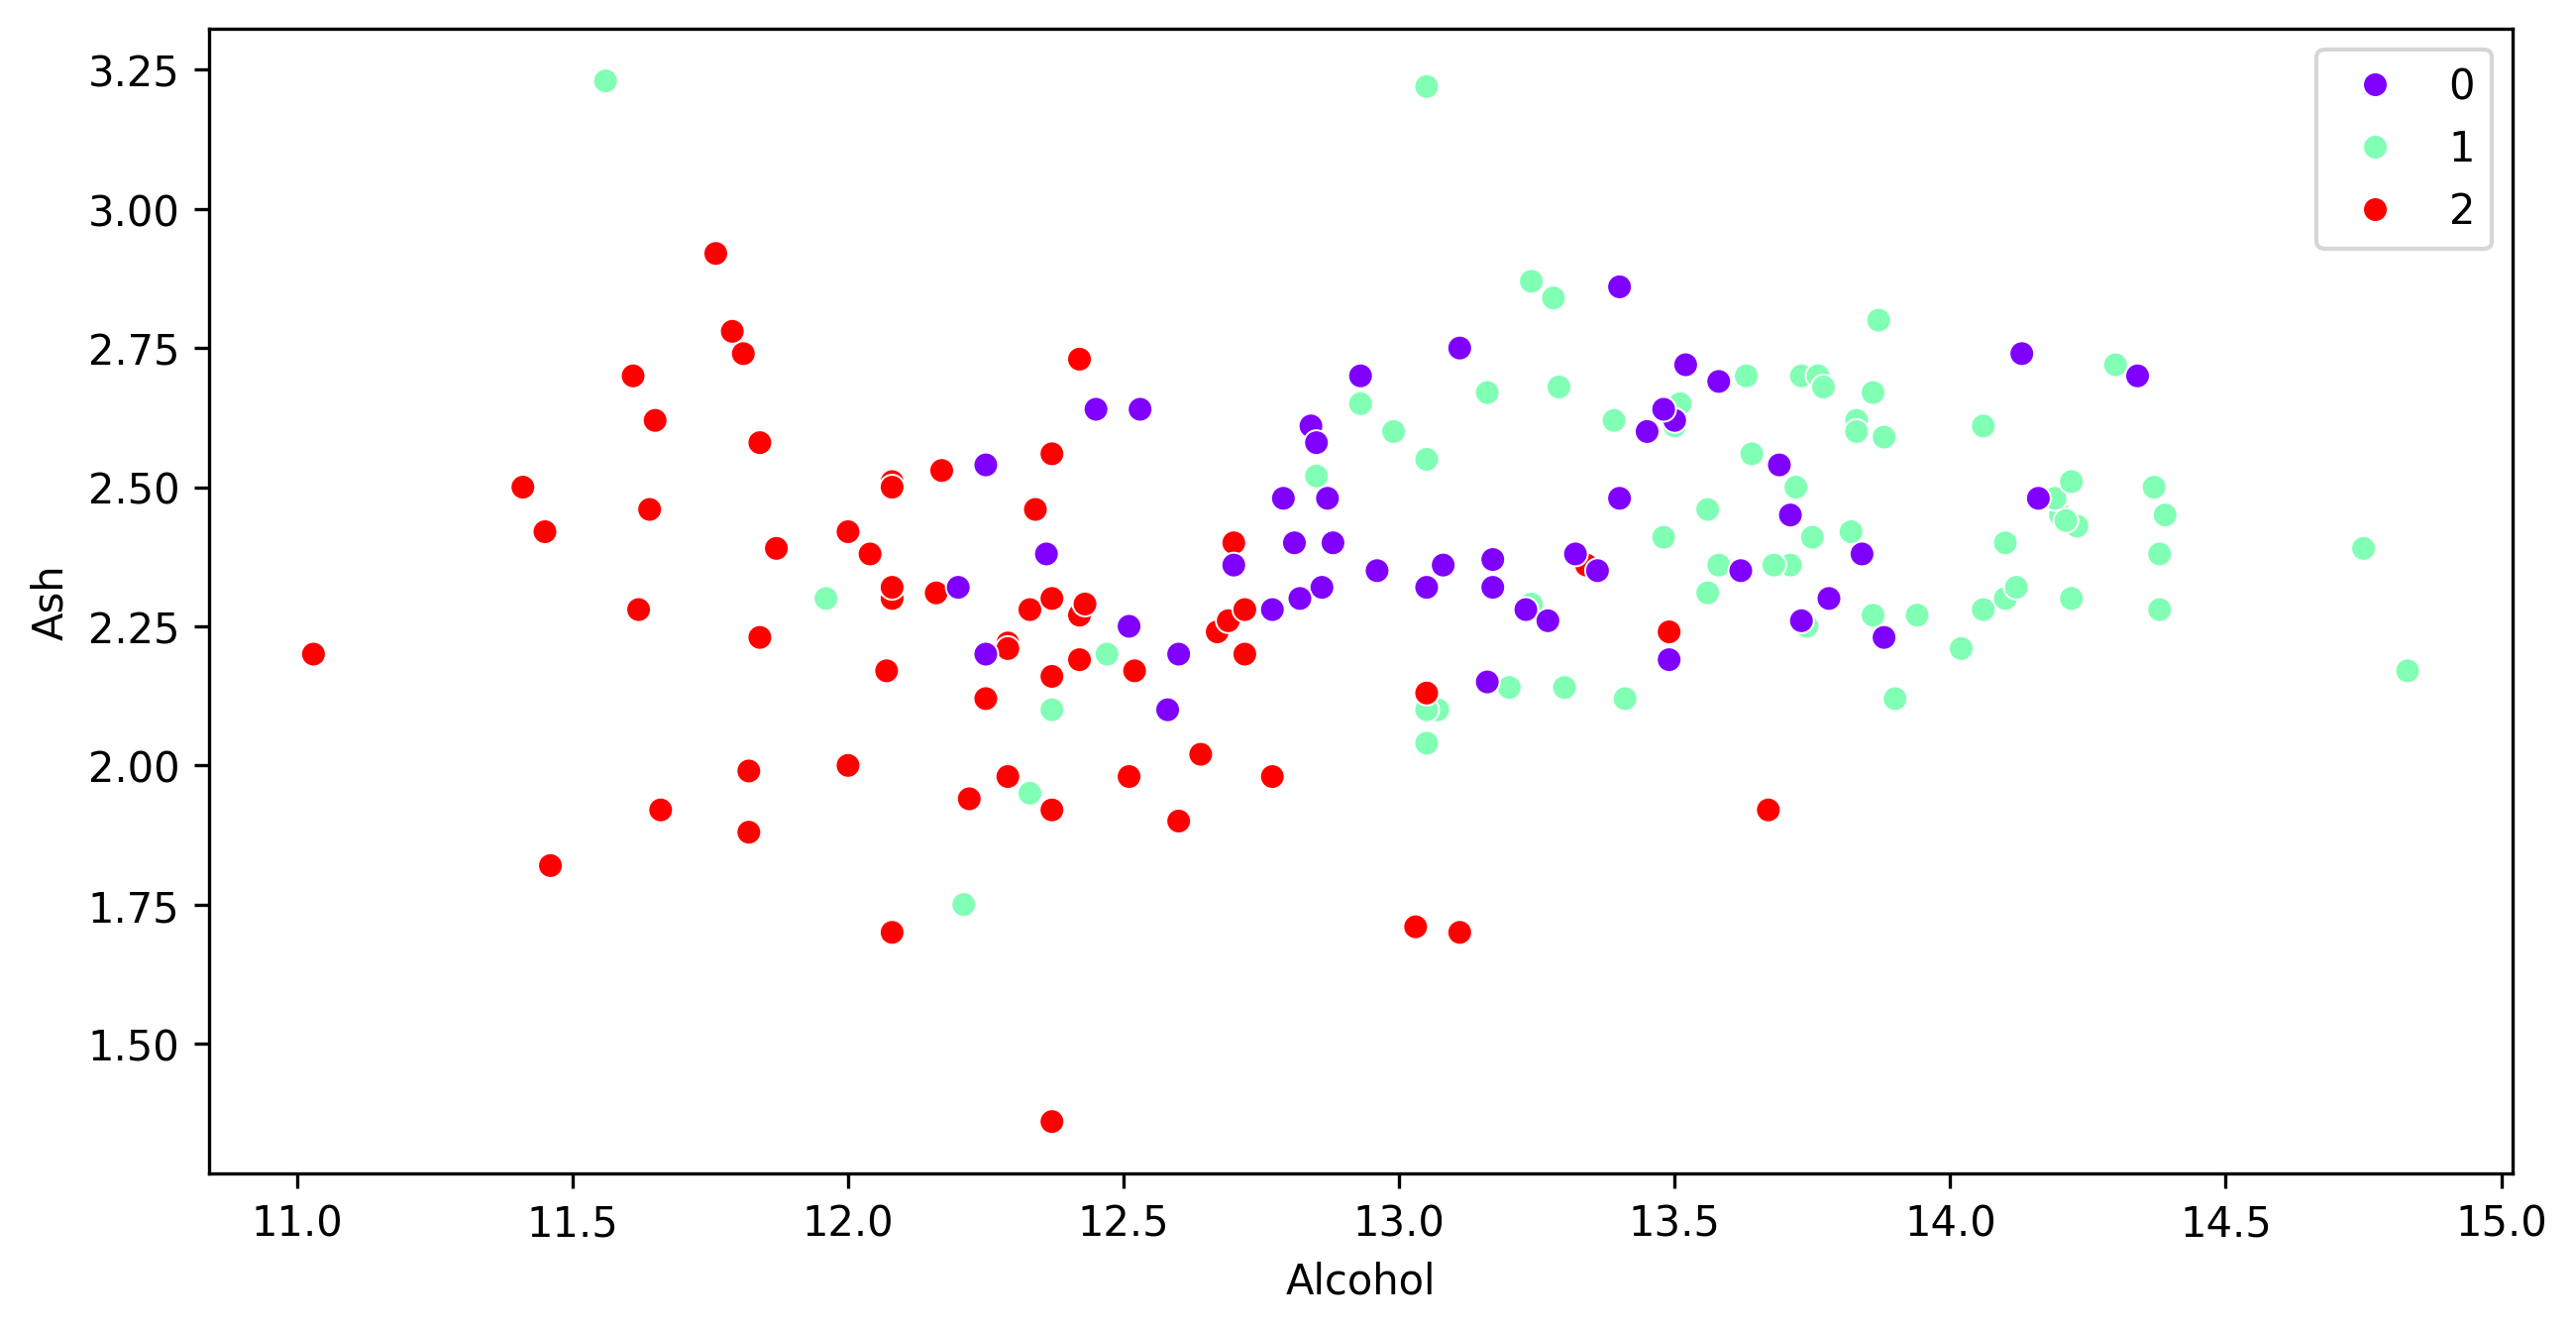

In [105]:
sns.scatterplot(x = df["Alcohol"],y =  df['Ash'], hue=bypred, palette='rainbow')


3.	Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.

In [106]:
from sklearn.metrics import silhouette_score
def calculate_silhouette_score(data,cluster_labels):
    silhouette = silhouette_score(data, cluster_labels)
    return silhouette
bsilhouette = calculate_silhouette_score(df,bypred)
print("Silhouette Score:", bsilhouette)


Silhouette Score: 0.1977150583182205


## Task 4: Clustering with PCA Data:## PCA
1.	Apply the same clustering algorithm to the PCA-transformed dataset.

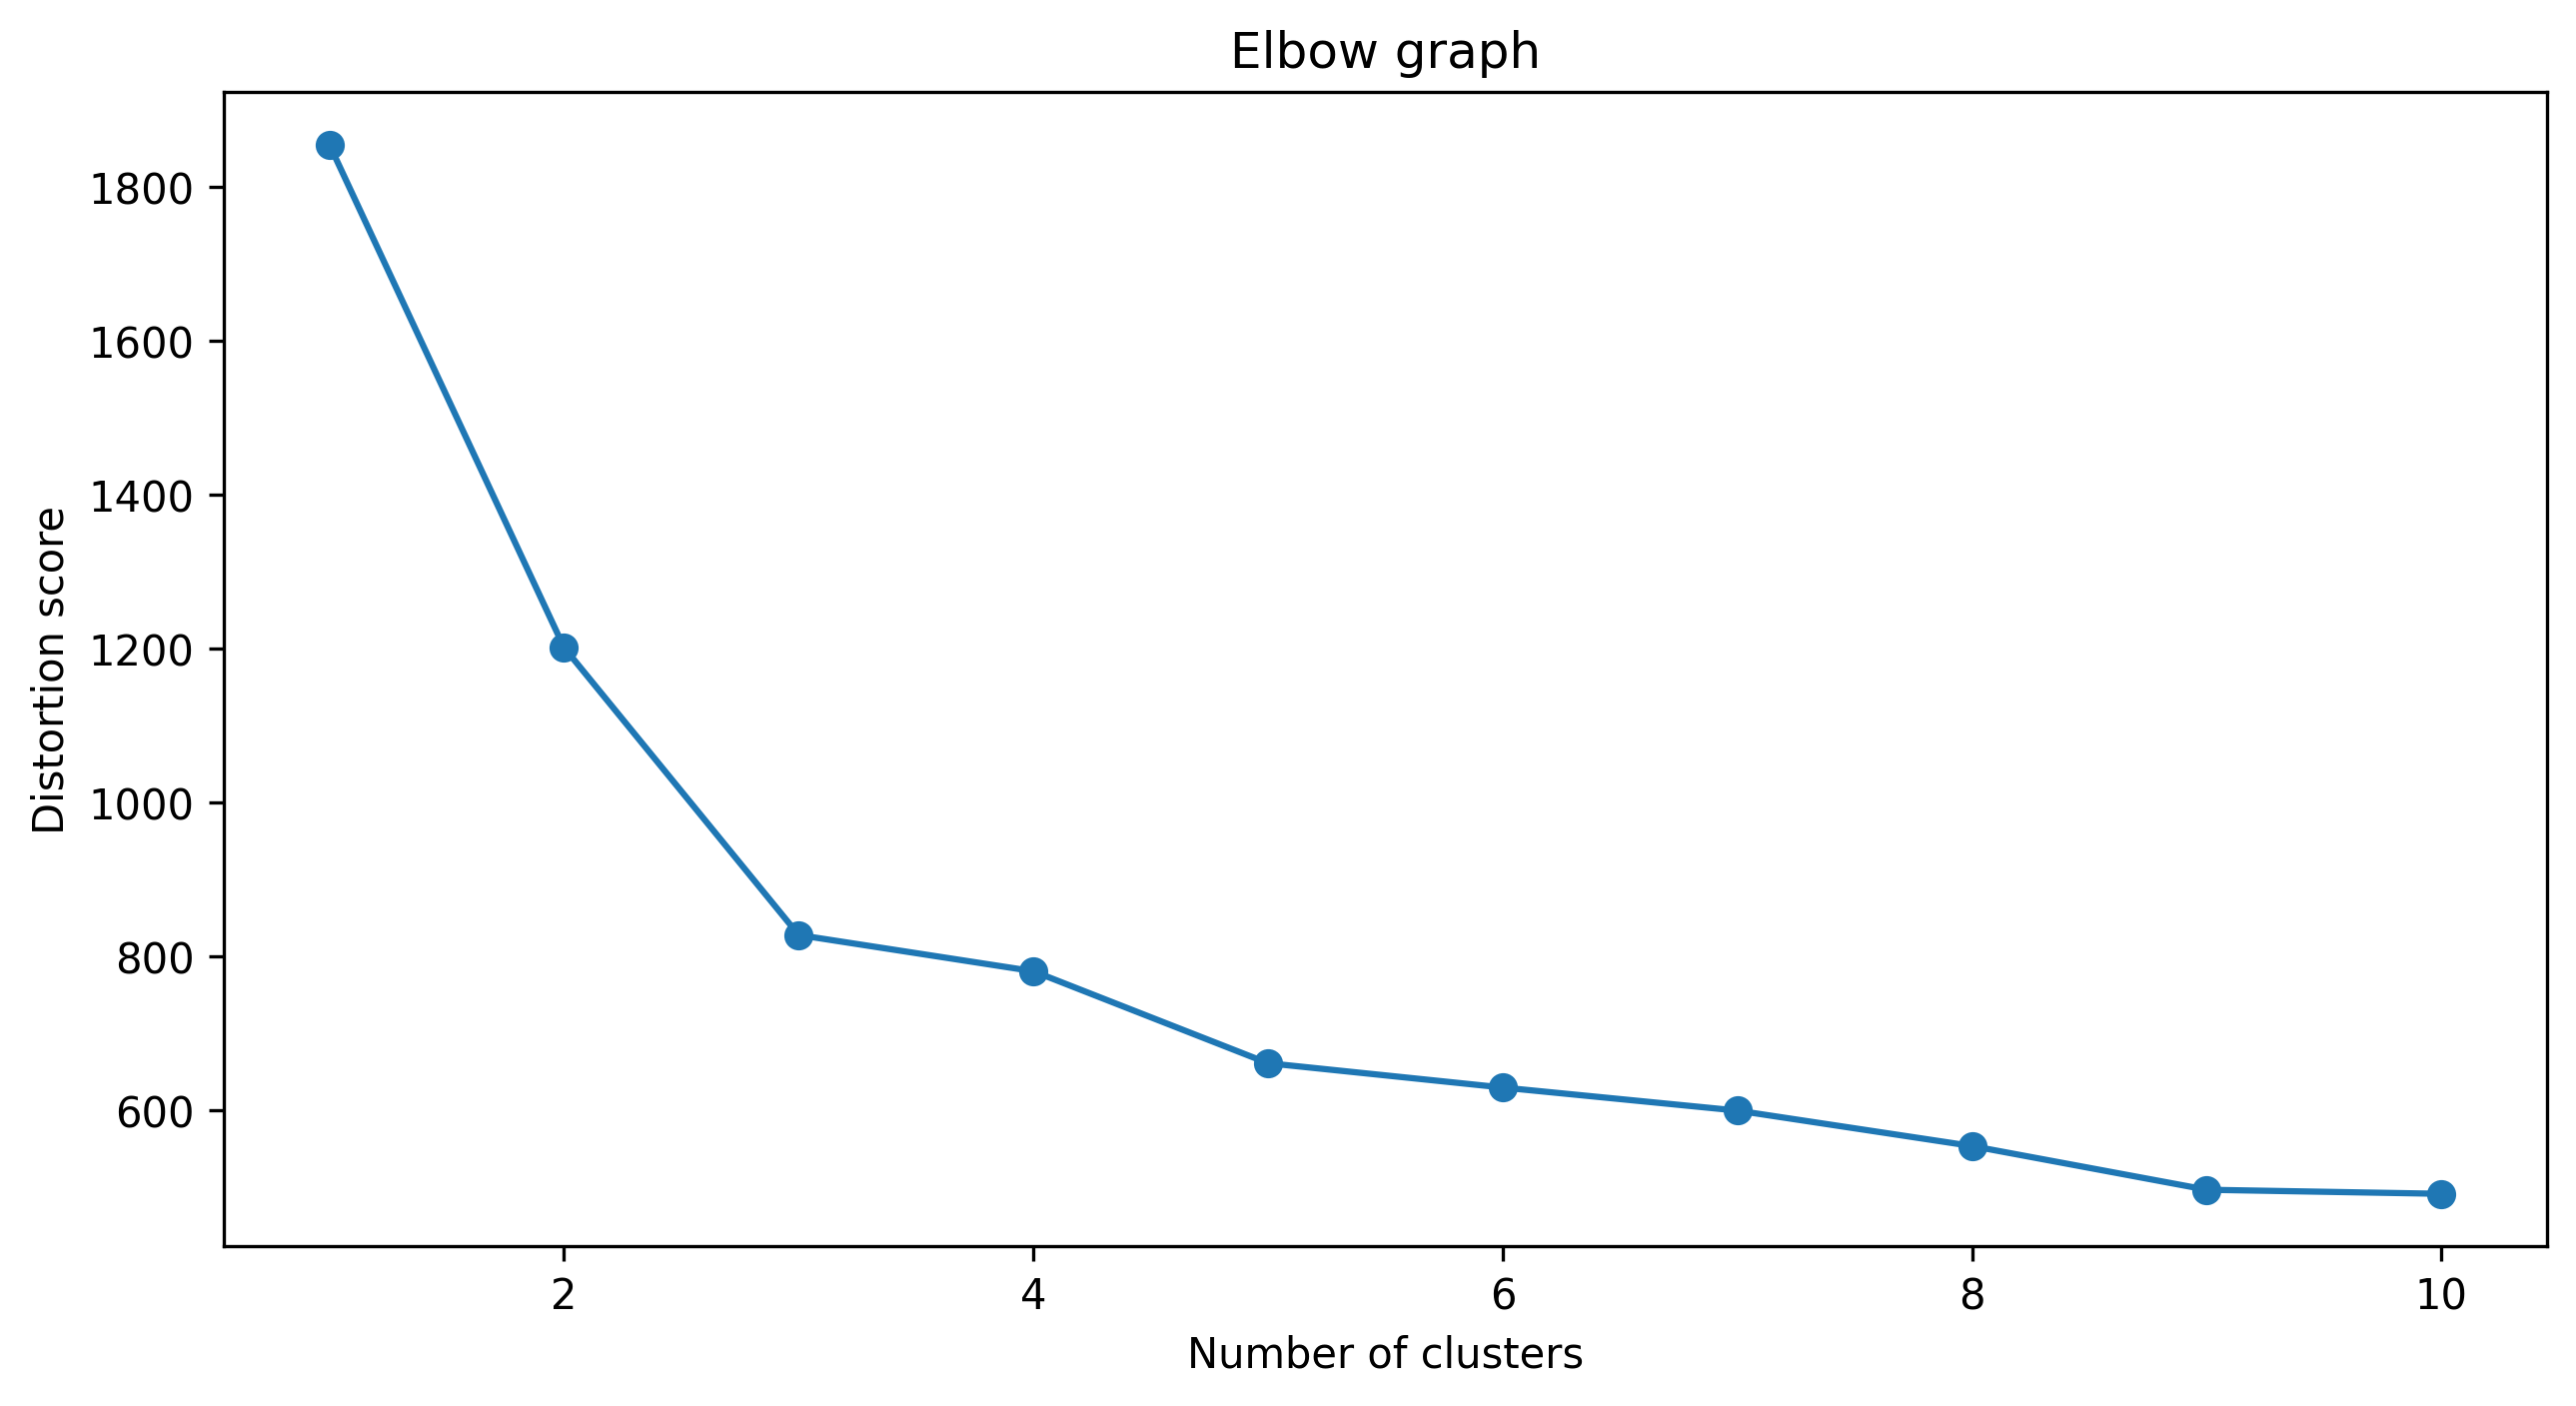

In [107]:
distortions = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion score')
plt.title('Elbow graph')
plt.show()


In [108]:
labels , Ccenters, ypred = kmean_clustering(X, k= 3)


2.	Visualize the clustering results obtained from PCA-transformed data.

Text(0.5, 1.0, 'Distribution of data before PCA')

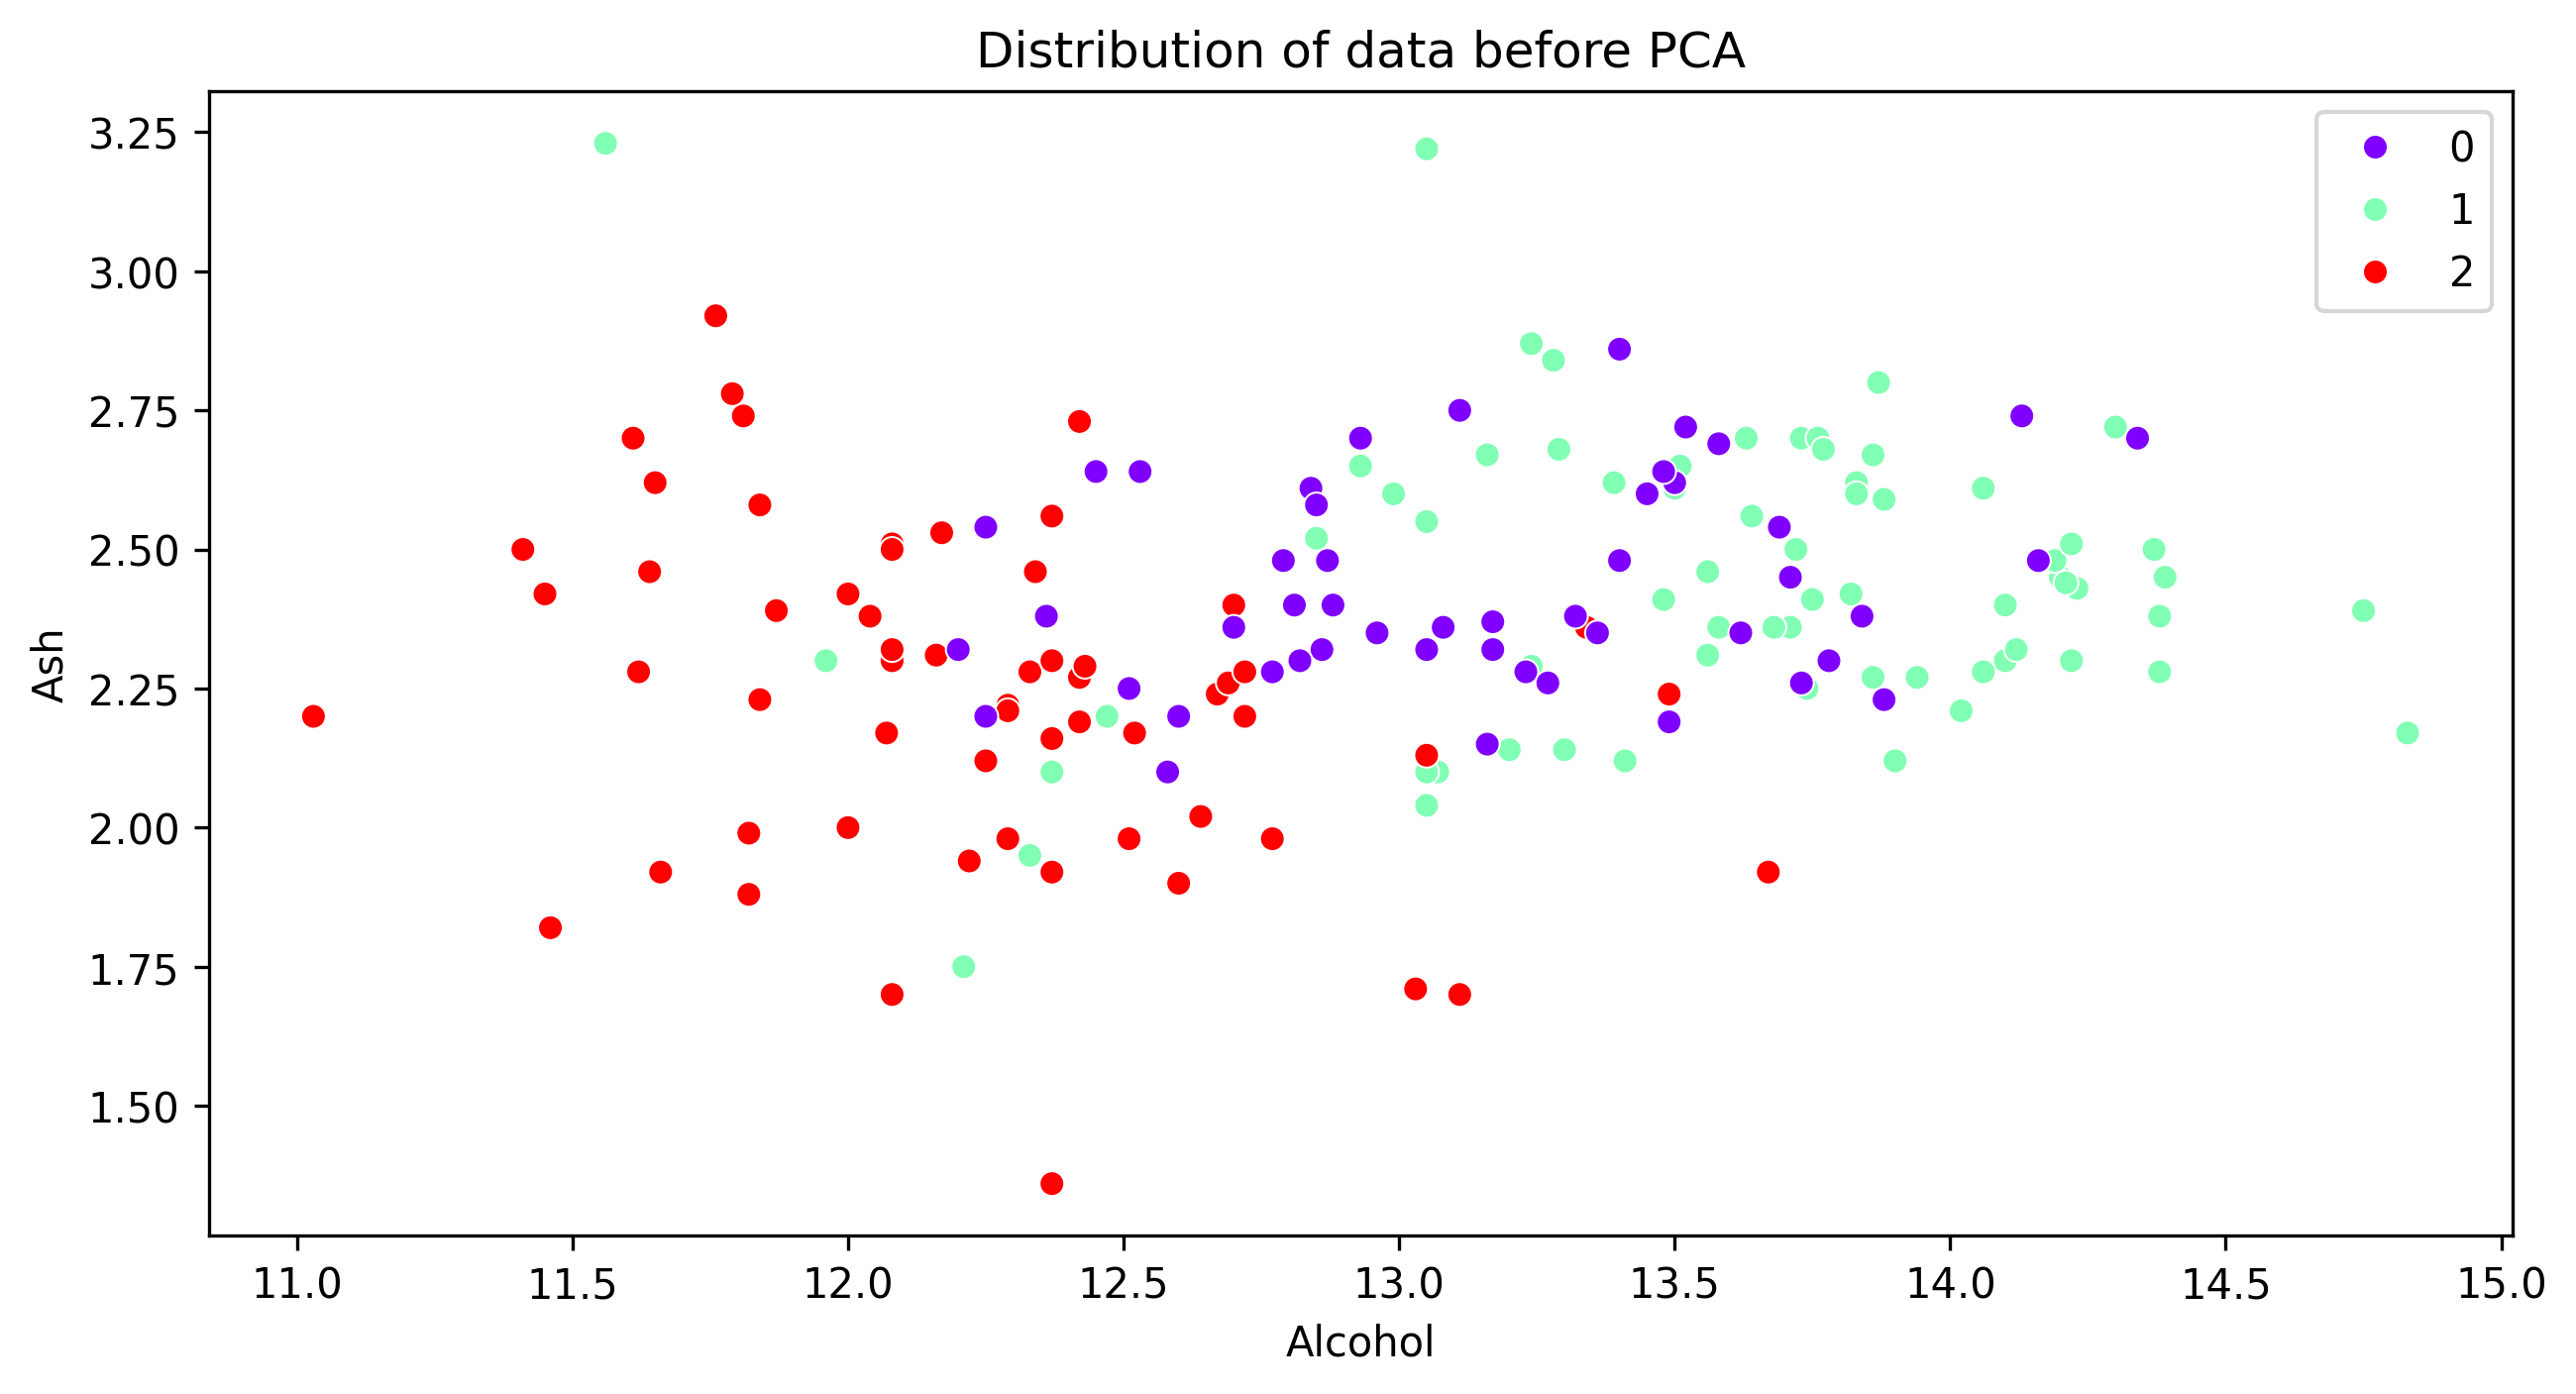

In [109]:
sns.scatterplot(x = df["Alcohol"],y =  df['Ash'], hue=bypred, palette='rainbow')
plt.title("Distribution of data before PCA")


Text(0.5, 1.0, 'Distribution of data After PCA')

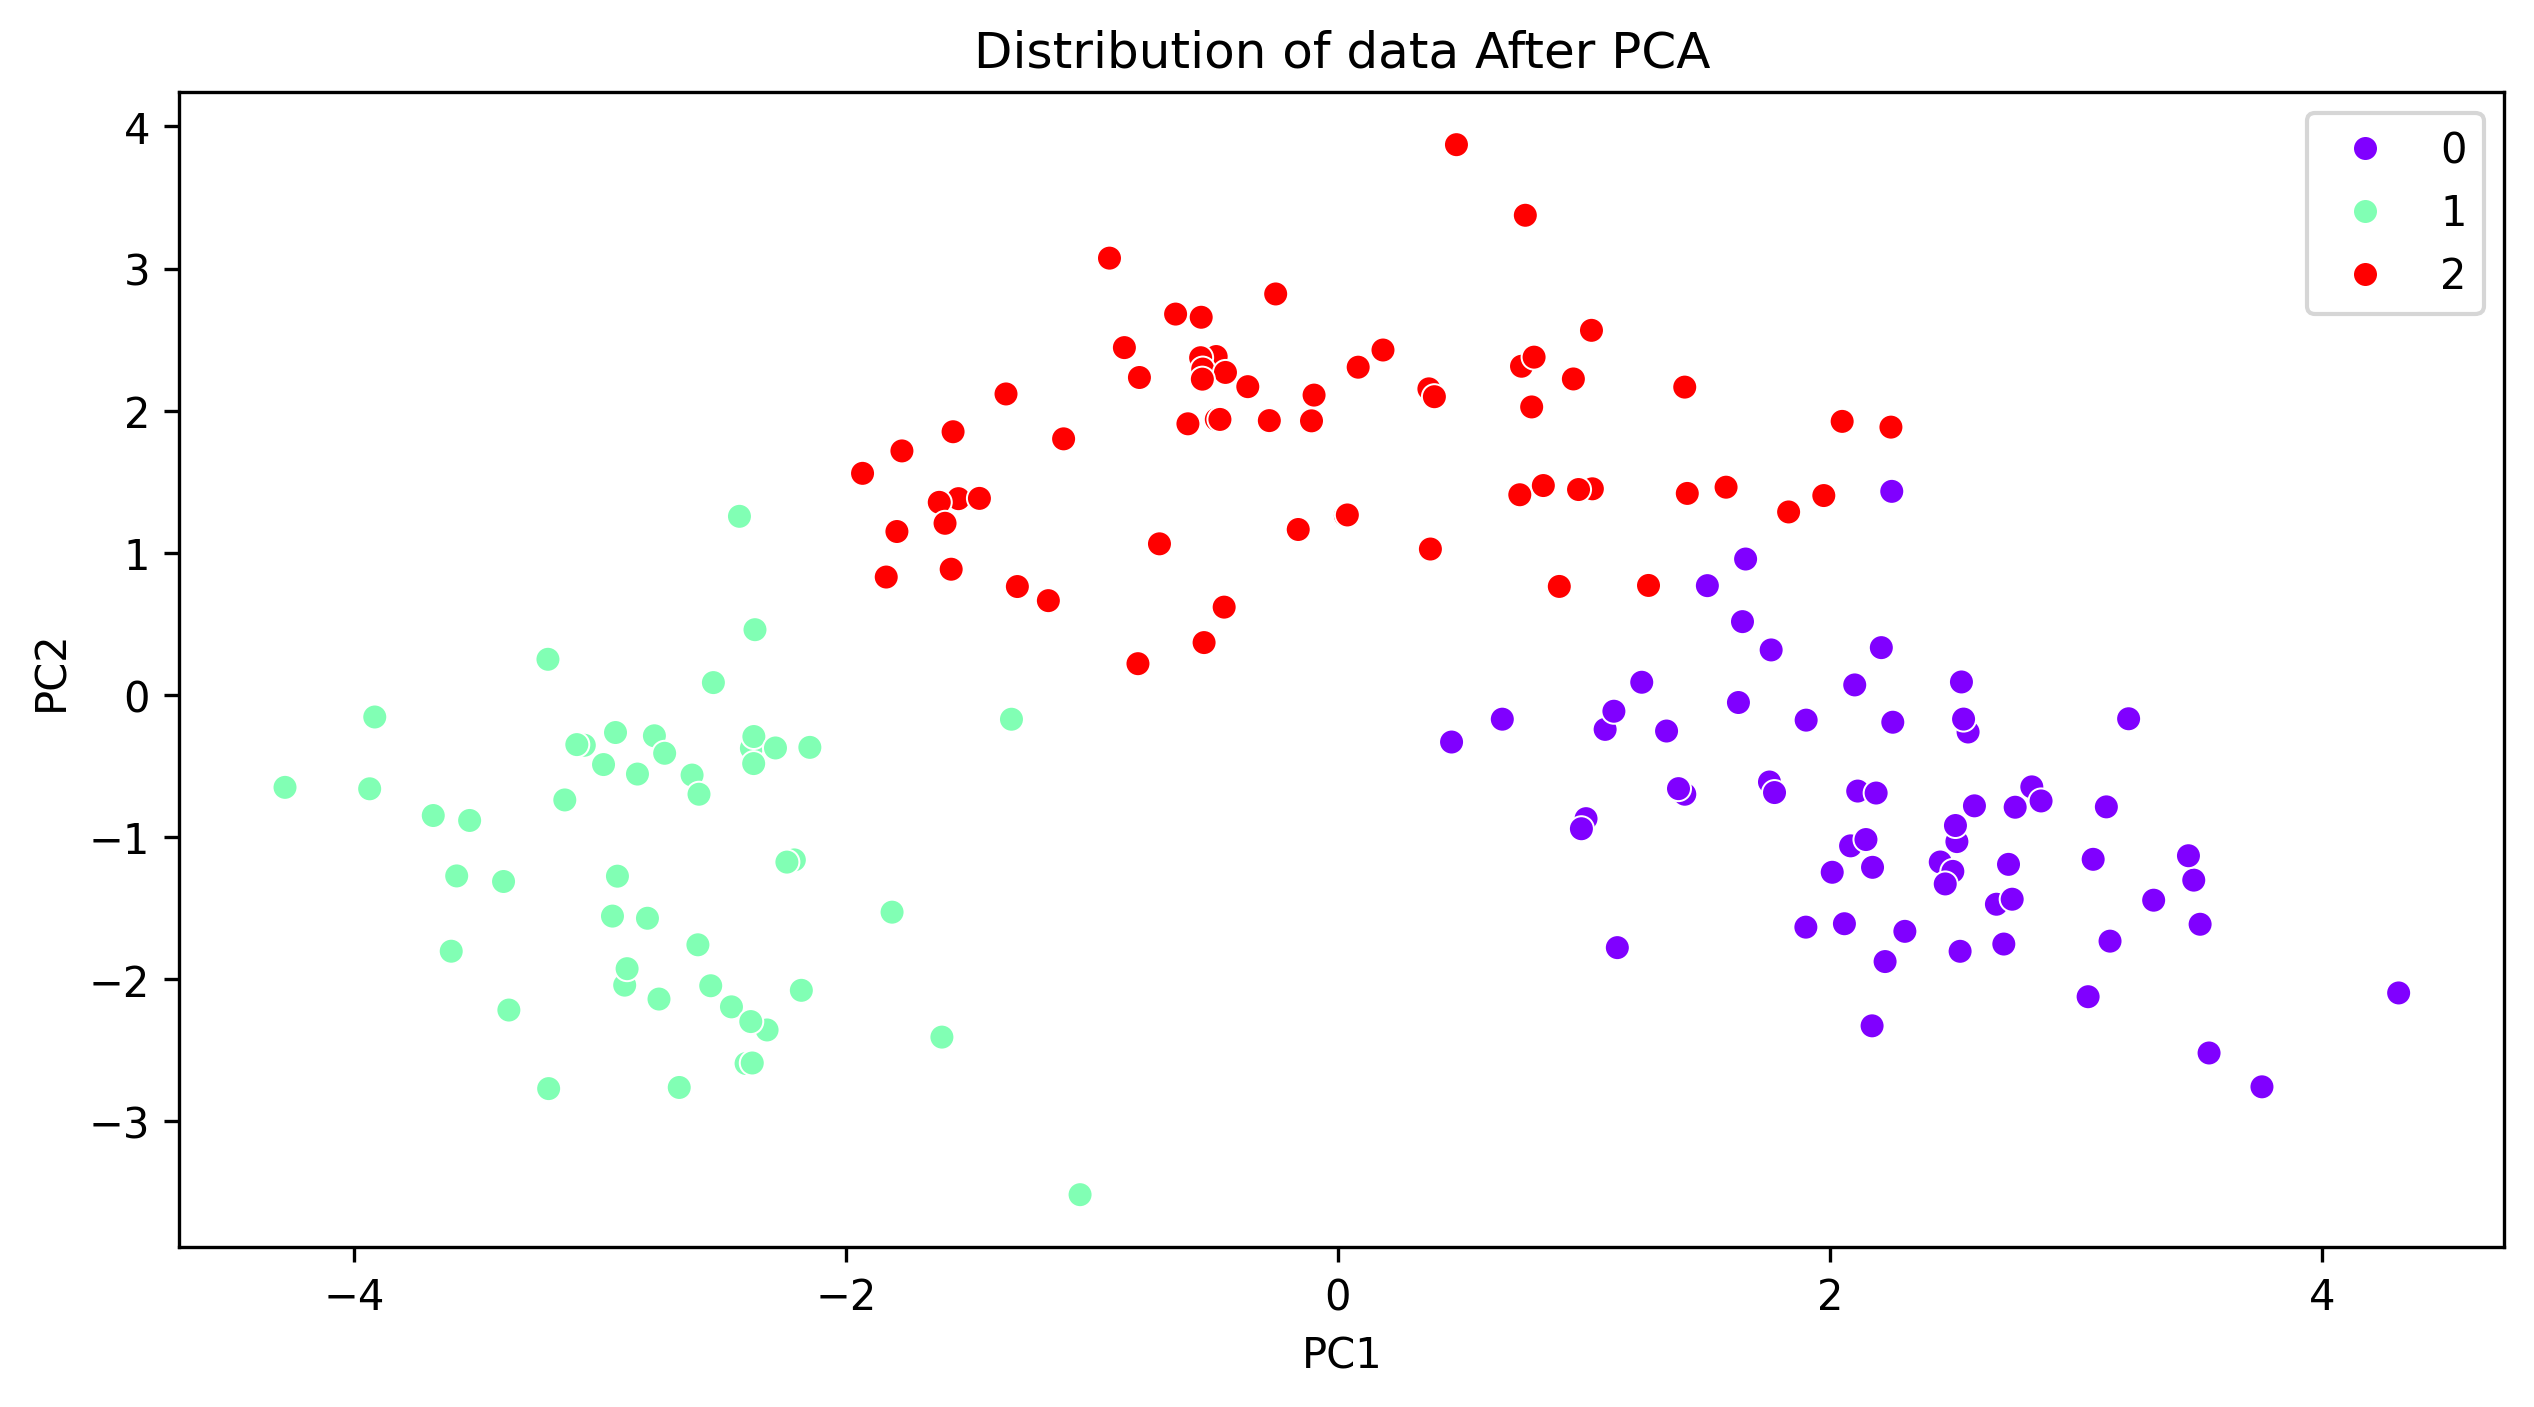

In [110]:
sns.scatterplot(x = X['PC1'],y=  X['PC2'], hue=ypred, palette='rainbow')
plt.title("Distribution of data After PCA")


3.	Compare the clustering results from PCA-transformed data with those from the original dataset.

In [111]:
Asilhouette = calculate_silhouette_score(X, ypred)
print("Silhouette Score before PCA:", bsilhouette)
print("Silhouette Score after PCA:", Asilhouette)


Silhouette Score before PCA: 0.1977150583182205
Silhouette Score after PCA: 0.3683321132072141


Task 5: Comparison and Analysis:
1.	Compare the clustering results obtained from the original dataset and PCA-transformed data.
2.	Discuss any similarities or differences observed in the clustering results.



(a) Visual Comparison (Scatter Plots)

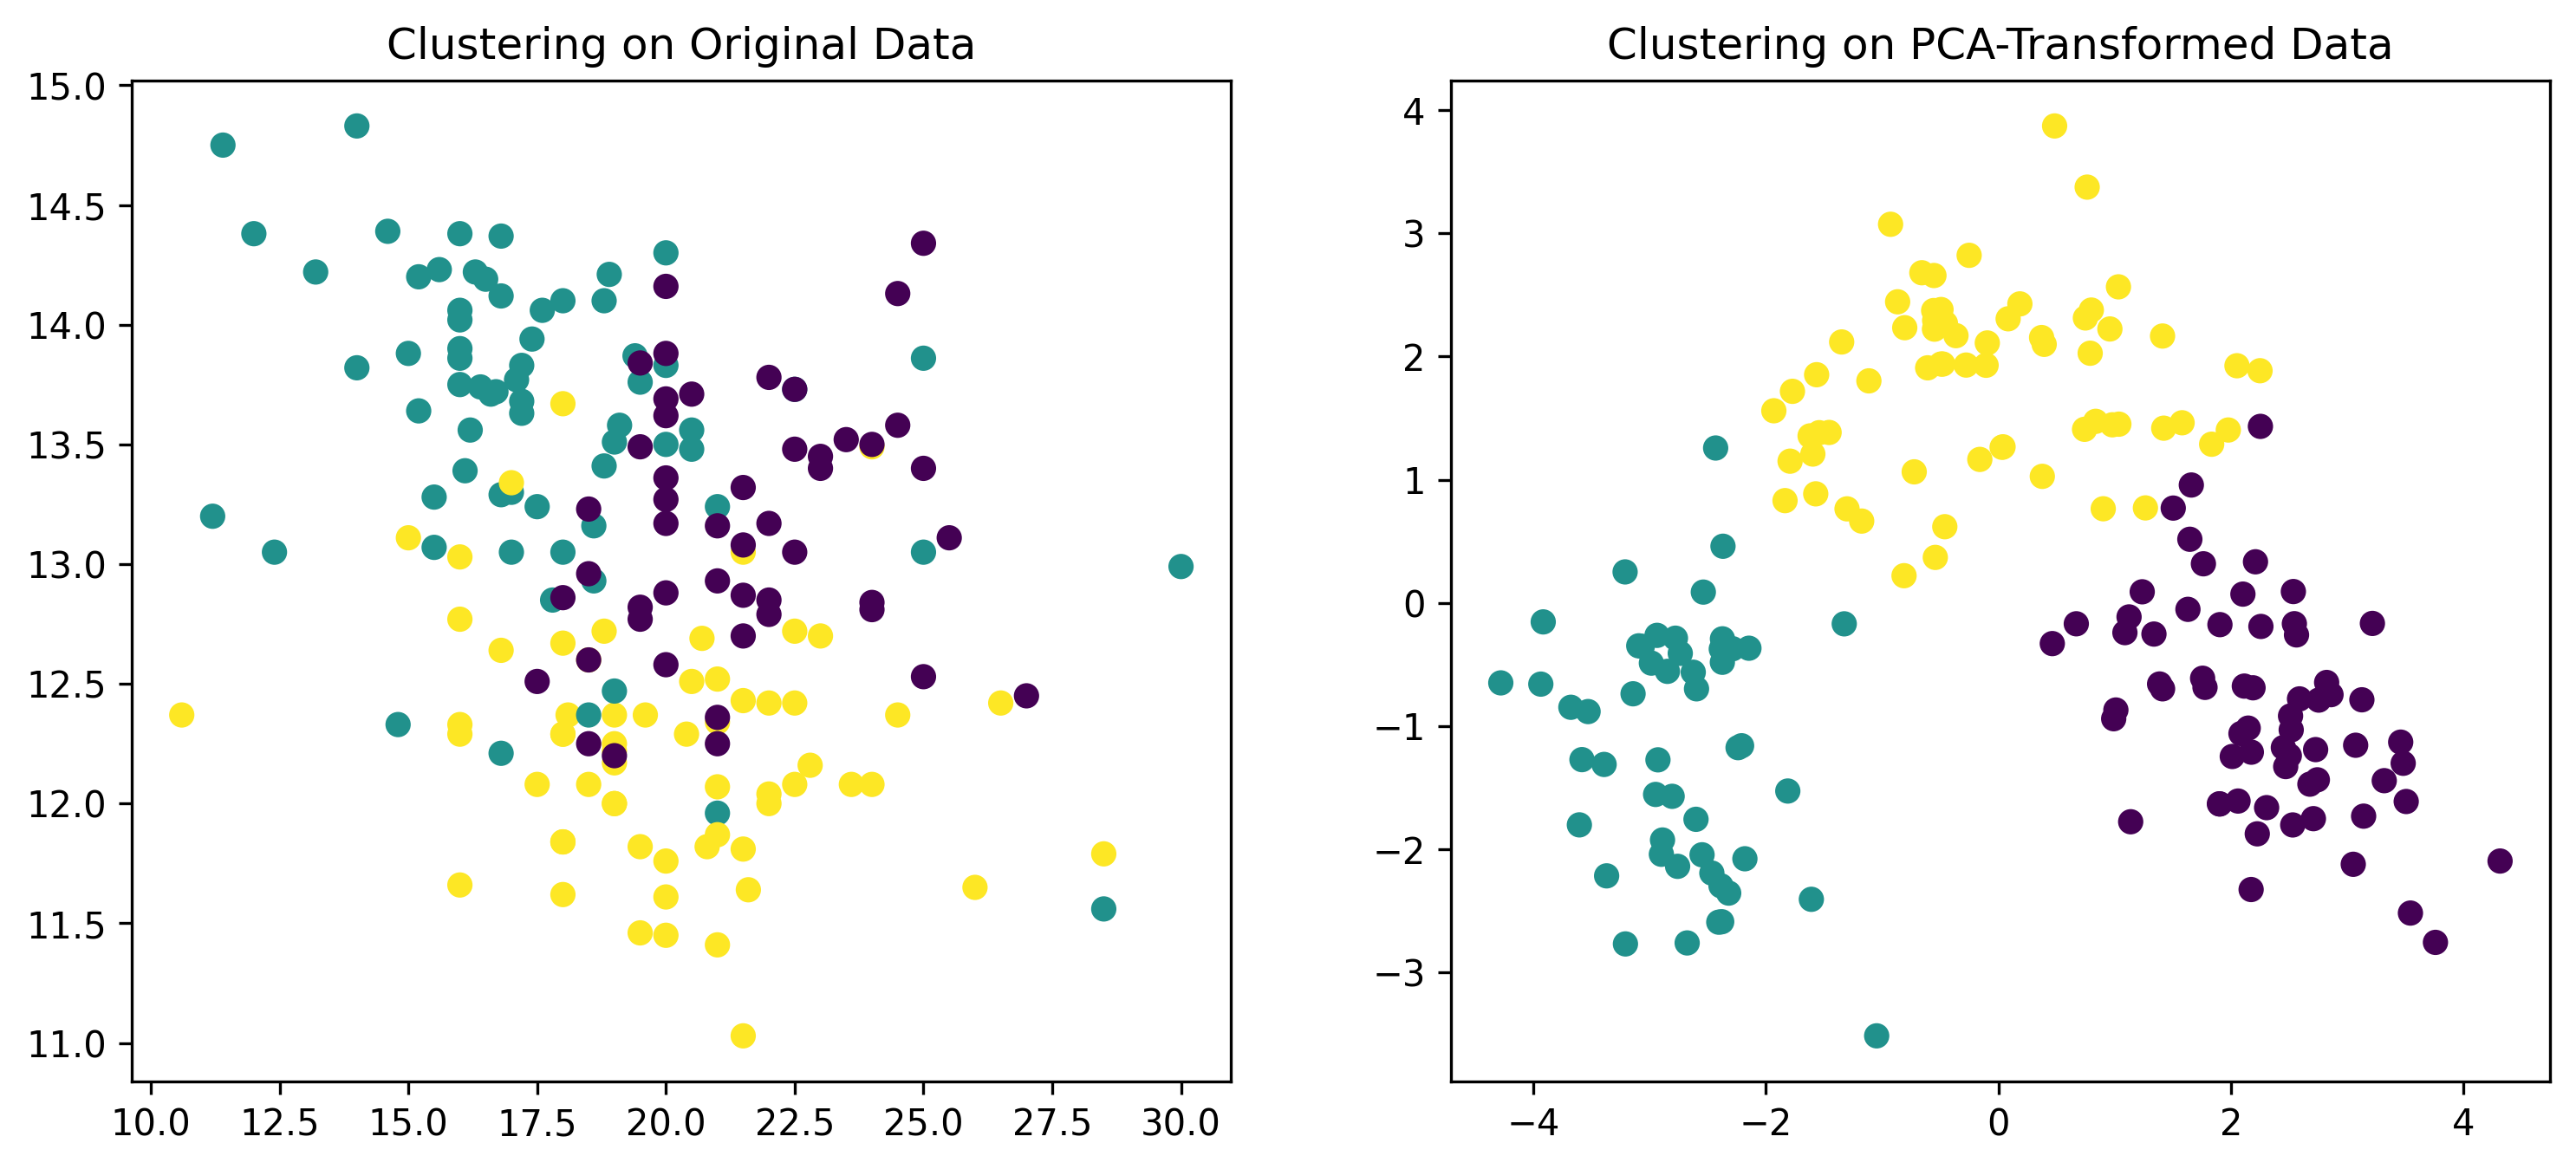

In [114]:
# Plot for original data
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.scatter(df["Alcalinity"], df["Alcohol"], c=bypred, cmap='viridis')
plt.title('Clustering on Original Data')

# Plot for PCA-transformed data
plt.subplot(1, 2, 2)
plt.scatter(X["PC1"], X["PC2"], c=ypred, cmap='viridis')
plt.title('Clustering on PCA-Transformed Data')

plt.show()


(b) Quantitative Comparison (Evaluation Metrics)

In [115]:
from sklearn.metrics import adjusted_rand_score, silhouette_score

# Adjusted Rand Index (for comparing the two cluster results)
ari_score = adjusted_rand_score(bypred, ypred)
print("Adjusted Rand Index (ARI):", ari_score)

# Silhouette Score for original data
print("Silhouette Score (Original Data):", bsilhouette)

# Silhouette Score for PCA-transformed data)
print("Silhouette Score (PCA Data):",Asilhouette)


Adjusted Rand Index (ARI): 0.930835942976779
Silhouette Score (Original Data): 0.1977150583182205
Silhouette Score (PCA Data): 0.3683321132072141


(c) Cluster Centroid Comparison

In [120]:
# Centroids comparison
print("Original Cluster Centroids:", OCcenters)
print("\n")
print("PCA Cluster Centroids:", Ccenters)


Original Cluster Centroids: [[ 0.16490746  0.87154706  0.18689833  0.52436746 -0.07547277 -0.97933029
  -1.21524764  0.72606354 -0.77970639  0.94153874 -1.16478865 -1.29241163
  -0.40708796]
 [-0.92607185 -0.39404154 -0.49451676  0.17060184 -0.49171185 -0.07598265
   0.02081257 -0.03353357  0.0582655  -0.90191402  0.46180361  0.27076419
  -0.75384618]
 [ 0.83523208 -0.30380968  0.36470604 -0.61019129  0.5775868   0.88523736
   0.97781956 -0.56208965  0.58028658  0.17106348  0.47398365  0.77924711
   1.12518529]]


PCA Cluster Centroids: [[ 2.26614991 -0.86559213  0.02839241 -0.11449227 -0.1467443 ]
 [-2.73771147 -1.16476397 -0.21176106  0.09274817  0.08103104]
 [-0.12731282  1.77556398  0.13704592  0.04203276  0.0834388 ]]


3.	Reflect on the impact of dimensionality reduction on clustering performance.
4.	Analyze the trade-offs between using PCA and clustering directly on the original dataset.

Dimensionality reduction, particularly with PCA, can significantly impact the performance of clustering in both positive and negative ways. Here are the key aspects to reflect on:

Positive Impact on Clustering Performance
-------------------------------------------
**Improved Efficiency:**

Reducing the number of features can speed up the clustering process, especially for algorithms like K-Means, which compute distances between data points. Lowering dimensionality makes these distance calculations faster and reduces computational costs.

**Noise Reduction:**

PCA helps by removing redundant or less informative features that contribute little to the variance. This can improve clustering performance by highlighting the most important underlying structure in the data, making clusters clearer.
In high-dimensional data, irrelevant features might introduce noise, making clustering less effective. PCA can eliminate this noise by focusing on components with the most variance.

## Task 6: Conclusion and Insights

Based on the results of your k-means clustering evaluation, you can draw the following conclusions:

1. **Adjusted Rand Index (ARI): 0.9308**  
   - The ARI score measures the similarity between the true labels and the predicted cluster labels, accounting for chance. A score of **0.9308** indicates a very high degree of agreement between your clustering results and the true labels. This suggests that the k-means model has done an excellent job of clustering the data in line with the ground truth.

2. **Silhouette Score (Original Data): 0.1977**  
   - The silhouette score measures how similar an object is to its own cluster compared to other clusters. Scores range from -1 to 1, where a value near 1 indicates well-separated clusters, 0 means clusters are overlapping, and negative values imply incorrect clustering.  
   - The **0.1977** silhouette score for the original data suggests that the clusters are **somewhat overlapping** or not clearly defined. While not a strong score, it indicates that the clusters are moderately distinguishable but not highly separated.

3. **Silhouette Score (PCA Data): 0.3683**  
   - After applying **PCA (Principal Component Analysis)**, the silhouette score improved to **0.3683**, indicating **better-defined clusters** compared to the original data. The improvement suggests that PCA helped to reduce noise or irrelevant dimensions, enhancing the separation between clusters. While this score is still moderate, it reflects a more distinct clustering structure after dimensionality reduction.

### Overall Conclusion:
- The **high ARI score (0.93)** indicates that the k-means clustering results are very close to the true labels.
- The **silhouette scores** show that clustering was not perfect, but **PCA significantly improved the cluster separability**.
- You can conclude that **dimensionality reduction using PCA** was beneficial for clustering and resulted in clearer, more distinct clusters. However, further improvements (e.g., tuning the number of clusters or using different clustering algorithms) might be explored to achieve better-defined clusters.